## Lib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


## Preproccessing

In [7]:
df = pd.read_csv("CBC-Dataset.csv")
df.head()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,PLT,MPV,PCT,PDW,SD,SDTSD,TSD,FERRITTE,FOLATE,B12
0,1,106.32,93.10,6.01,1.72,1.67,3.82,4.27,12.40,38.10,...,240.00,8.70,0.21,8.50,85.00,409.40,20.762091,195.40,5.91,1879.0
1,1,89.31,7.67,78.98,0.54,0.04,2.09,4.97,11.46,36.44,...,75.99,12.29,0.09,22.87,78.00,369.40,21.115322,373.50,7.25,1121.0
2,1,85.73,75.17,4.55,4.34,0.20,1.46,4.99,14.68,46.96,...,160.90,8.89,0.14,19.72,111.00,402.00,27.611940,51.10,7.01,1612.0
3,1,73.09,3.42,66.45,0.76,0.09,2.37,4.37,13.24,39.30,...,116.70,7.06,0.08,20.75,69.00,383.00,18.015666,89.33,14.61,433.5
4,1,60.87,3.23,54.05,1.67,0.30,1.61,3.62,10.89,33.21,...,125.50,10.22,0.13,22.12,74.27,356.37,20.840699,94.38,5.81,363.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GENDER    30000 non-null  int64  
 1   WBC       30000 non-null  float64
 2   NE#       30000 non-null  float64
 3   LY#       30000 non-null  float64
 4   MO#       30000 non-null  float64
 5   EO#       30000 non-null  float64
 6   BA#       30000 non-null  float64
 7   RBC       30000 non-null  float64
 8   HGB       30000 non-null  float64
 9   HCT       30000 non-null  float64
 10  MCV       30000 non-null  float64
 11  MCH       30000 non-null  float64
 12  MCHC      30000 non-null  float64
 13  RDW       30000 non-null  float64
 14  PLT       30000 non-null  float64
 15  MPV       30000 non-null  float64
 16  PCT       30000 non-null  float64
 17  PDW       30000 non-null  float64
 18  SD        30000 non-null  float64
 19  SDTSD     30000 non-null  float64
 20  TSD       30000 non-null  fl

In [9]:
df.describe()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,PLT,MPV,PCT,PDW,SD,SDTSD,TSD,FERRITTE,FOLATE,B12
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.393267,64.741016,50.717203,23.097595,4.832011,2.393830,6.096100,4.450508,12.786489,38.054165,...,566.447548,10.229697,0.515586,16.727118,149.035296,424.638747,35.049311,6738.937174,16.929339,8483.680154
std,0.488483,76.447472,61.355523,27.946269,5.741358,2.976138,7.904098,1.447098,4.192183,12.852927,...,479.878216,3.703135,0.447335,4.638485,127.385385,205.496048,26.759833,8719.985556,13.391797,10721.389280
min,0.000000,0.570000,0.030000,0.110000,0.000000,0.000000,0.000000,0.870000,2.990000,7.210000,...,13.000000,3.620000,0.010000,7.300000,5.000000,41.110000,1.287001,0.500000,0.550000,30.000000
25%,0.000000,7.299500,4.280000,2.060000,0.510000,0.110000,0.050000,3.777500,10.500000,31.860000,...,224.000000,7.570000,0.193000,12.500000,51.000000,299.535000,13.977112,38.427500,7.000000,302.375000
50%,0.000000,12.445000,9.125000,3.520000,0.930000,0.380000,0.140000,4.620000,12.820000,38.800000,...,319.685000,9.560000,0.280000,17.970000,95.000000,382.000000,25.865000,590.850000,10.830000,931.365000
75%,1.000000,121.065000,96.345000,44.080000,9.102500,4.630000,12.122500,5.280000,15.100000,44.850000,...,871.962500,12.050000,0.800000,20.282500,231.940000,513.302500,51.620000,13319.672500,25.212500,16481.107500
max,1.000000,246.700000,197.200000,89.600000,18.510000,9.410000,24.730000,7.500000,22.450000,67.400000,...,1770.000000,19.600000,1.630000,25.000000,461.640000,947.270000,100.000000,27332.000000,50.250000,33880.000000


In [10]:
df.isnull().sum()

GENDER      0
WBC         0
NE#         0
LY#         0
MO#         0
EO#         0
BA#         0
RBC         0
HGB         0
HCT         0
MCV         0
MCH         0
MCHC        0
RDW         0
PLT         0
MPV         0
PCT         0
PDW         0
SD          0
SDTSD       0
TSD         0
FERRITTE    0
FOLATE      0
B12         0
dtype: int64

In [11]:
df.duplicated().sum()

88

In [12]:
df.nunique()

GENDER          2
WBC         12040
NE#         11139
LY#          7612
MO#          2624
EO#          1519
BA#          2773
RBC           841
HGB          1982
HCT          5695
MCV          6872
MCH          9288
MCHC         9732
RDW          2963
PLT         17248
MPV          1737
PCT           612
PDW          1769
SD          16589
SDTSD       20161
TSD         20158
FERRITTE    22188
FOLATE       4776
B12         19953
dtype: int64

In [22]:
df1 = df.drop_duplicates()

In [23]:
df1.duplicated().sum()

0

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29912 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GENDER    29912 non-null  int64  
 1   WBC       29912 non-null  float64
 2   NE#       29912 non-null  float64
 3   LY#       29912 non-null  float64
 4   MO#       29912 non-null  float64
 5   EO#       29912 non-null  float64
 6   BA#       29912 non-null  float64
 7   RBC       29912 non-null  float64
 8   HGB       29912 non-null  float64
 9   HCT       29912 non-null  float64
 10  MCV       29912 non-null  float64
 11  MCH       29912 non-null  float64
 12  MCHC      29912 non-null  float64
 13  RDW       29912 non-null  float64
 14  PLT       29912 non-null  float64
 15  MPV       29912 non-null  float64
 16  PCT       29912 non-null  float64
 17  PDW       29912 non-null  float64
 18  SD        29912 non-null  float64
 19  SDTSD     29912 non-null  float64
 20  TSD       29912 non-null  float64

In [25]:
df1.describe()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,PLT,MPV,PCT,PDW,SD,SDTSD,TSD,FERRITTE,FOLATE,B12
count,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,...,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000,29912.000000
mean,0.392986,64.899956,50.842263,23.160663,4.844212,2.400578,6.113853,4.449878,12.785113,38.047897,...,567.408315,10.233597,0.516492,16.724574,149.313873,425.033052,35.093493,6757.886111,16.954878,8507.305069
std,0.488422,76.502808,61.401474,27.963079,5.745324,2.977901,7.908927,1.448855,4.197579,12.869397,...,480.216247,3.706800,0.447653,4.639449,127.461401,205.616956,26.779502,8725.759404,13.401797,10728.263108
min,0.000000,0.570000,0.030000,0.110000,0.000000,0.000000,0.000000,0.870000,2.990000,7.210000,...,13.000000,3.620000,0.010000,7.300000,5.000000,41.110000,1.287001,0.500000,0.550000,30.000000
25%,0.000000,7.300000,4.280000,2.070000,0.510000,0.110000,0.050000,3.770000,10.500000,31.817500,...,224.000000,7.570000,0.194000,12.500000,51.000000,300.000000,13.985686,38.410000,7.000000,302.600000
50%,0.000000,12.500000,9.160000,3.550000,0.930000,0.390000,0.150000,4.620000,12.820000,38.800000,...,320.075000,9.570000,0.280000,17.960000,95.150000,382.260000,25.935829,606.720000,10.855000,956.385000
75%,1.000000,121.522500,96.700000,44.252500,9.130000,4.640000,12.160000,5.280000,15.100000,44.860000,...,873.477500,12.062500,0.810000,20.280000,232.417500,514.055000,51.702500,13345.427500,25.270000,16525.542500
max,1.000000,246.700000,197.200000,89.600000,18.510000,9.410000,24.730000,7.500000,22.450000,67.400000,...,1770.000000,19.600000,1.630000,25.000000,461.640000,947.270000,100.000000,27332.000000,50.250000,33880.000000


In [26]:
df1.head(10)

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,PLT,MPV,PCT,PDW,SD,SDTSD,TSD,FERRITTE,FOLATE,B12
0,1,106.32,93.10,6.01,1.72,1.67,3.82,4.27,12.40,38.10,...,240.00,8.70,0.21,8.50,85.00,409.40,20.762091,195.40,5.91,1879.0
1,1,89.31,7.67,78.98,0.54,0.04,2.09,4.97,11.46,36.44,...,75.99,12.29,0.09,22.87,78.00,369.40,21.115322,373.50,7.25,1121.0
2,1,85.73,75.17,4.55,4.34,0.20,1.46,4.99,14.68,46.96,...,160.90,8.89,0.14,19.72,111.00,402.00,27.611940,51.10,7.01,1612.0
3,1,73.09,3.42,66.45,0.76,0.09,2.37,4.37,13.24,39.30,...,116.70,7.06,0.08,20.75,69.00,383.00,18.015666,89.33,14.61,433.5
4,1,60.87,3.23,54.05,1.67,0.30,1.61,3.62,10.89,33.21,...,125.50,10.22,0.13,22.12,74.27,356.37,20.840699,94.38,5.81,363.5
5,1,60.54,6.91,51.97,0.23,0.00,1.42,3.05,9.78,27.95,...,112.10,6.57,0.07,20.58,38.00,236.00,16.101695,459.90,8.34,1011.0
6,1,58.26,6.34,33.13,18.51,0.17,0.11,5.03,12.90,39.90,...,341.00,11.30,0.38,14.30,27.00,394.60,6.842372,18.98,7.95,775.2
7,1,52.10,43.46,3.89,4.22,0.25,0.28,5.22,14.95,45.06,...,229.40,6.39,0.15,20.70,23.62,306.92,7.695816,118.10,6.98,1048.0
9,1,51.77,40.18,4.68,2.10,1.17,3.64,4.23,12.80,39.20,...,989.00,10.80,1.07,13.10,93.00,327.40,28.405620,335.00,6.30,1501.0
10,1,49.66,6.49,41.72,0.41,0.10,0.94,4.24,11.34,38.48,...,93.13,10.57,0.10,21.72,42.00,273.40,15.362107,39.62,7.97,557.8


In [27]:
df1.columns

Index(['GENDER', 'WBC', 'NE#', 'LY#', 'MO#', 'EO#', 'BA#', 'RBC', 'HGB', 'HCT',
       'MCV', 'MCH', 'MCHC', 'RDW', 'PLT', 'MPV', 'PCT', 'PDW', 'SD', 'SDTSD',
       'TSD', 'FERRITTE', 'FOLATE', 'B12'],
      dtype='object')

In [29]:
df1.shape[0]

29912

In [33]:
columns_to_drop = ["MPV","PCT","PDW", "SD", "SDTSD", "TSD", "FERRITTE", "FOLATE", "B12"]
df2 = df1.drop(columns=columns_to_drop)

# output_path = "CBC-Preprocessed.csv"
# df2.to_csv(output_path, index=False)

df2.shape


(29912, 15)

## Detected Impossible Ranges

In [34]:
# نستخدم القيم المستحيلة التي حددناها يدويًا سابقًا
# هذه الحدود تمثل الحالات المستحيلة طبياً لكل عمود

manual_impossible_ranges = {
    "WBC": (1.0, 200.0),
    "NE#": (0.1, 100.0),
    "LY#": (0.1, 100.0),
    "MO#": (0.01, 20.0),
    "EO#": (0.01, 5.0),
    "BA#": (0.00, 5.0),
    "RBC": (2.0, 10.0),
    "HGB": (3.0, 25.0),
    "HCT": (10.0, 70.0),
    "MCV": (50.0, 130.0),
    "MCH": (15.0, 45.0),
    "MCHC": (20.0, 40.0),
    "RDW": (10.0, 25.0),
    "PLT": (10.0, 1000.0),
}


# حساب عدد القيم المستحيلة في كل عمود
impossible_counts = {}
for col, (min_val, max_val) in manual_impossible_ranges.items():
    if col in df2.columns:
        invalid = df2[(df[col] < min_val) | (df2[col] > max_val) | (df2[col] <= 0)]
        impossible_counts[col] = len(invalid)

# طباعة النتيجة
for col, count in impossible_counts.items():
    print(f"{col}: {count} قيمة مستحيلة")



WBC: 2889 قيمة مستحيلة
NE#: 7251 قيمة مستحيلة
LY#: 0 قيمة مستحيلة
MO#: 5 قيمة مستحيلة
EO#: 7409 قيمة مستحيلة
BA#: 11884 قيمة مستحيلة
RBC: 2542 قيمة مستحيلة
HGB: 6 قيمة مستحيلة
HCT: 719 قيمة مستحيلة
MCV: 8 قيمة مستحيلة
MCH: 11249 قيمة مستحيلة
MCHC: 12829 قيمة مستحيلة
RDW: 7317 قيمة مستحيلة
PLT: 6391 قيمة مستحيلة


C:\Users\asus\AppData\Local\Temp\ipykernel_4184\3937673418.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid = df2[(df[col] < min_val) | (df2[col] > max_val) | (df2[col] <= 0)]
C:\Users\asus\AppData\Local\Temp\ipykernel_4184\3937673418.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid = df2[(df[col] < min_val) | (df2[col] > max_val) | (df2[col] <= 0)]
C:\Users\asus\AppData\Local\Temp\ipykernel_4184\3937673418.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid = df2[(df[col] < min_val) | (df2[col] > max_val) | (df2[col] <= 0)]
C:\Users\asus\AppData\Local\Temp\ipykernel_4184\3937673418.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid = df2[(df[col] < min_val) | (df2[col] > max_val) | (df2[col] <= 0)]
C:\Users\asus\AppData\Local\Temp\ipykernel_4184\3937673418.py:26: UserWarning: Boolean Series key will be reindexed to m

In [35]:
# نسخة جديدة من البيانات الأصلية
cleaned_df = df2.copy()

# حذف الصفوف التي تحتوي على أي قيمة مستحيلة في أي عمود
for col, (min_val, max_val) in manual_impossible_ranges.items():
    if col in cleaned_df.columns:
        cleaned_df = cleaned_df[(cleaned_df[col] >= min_val) & (cleaned_df[col] <= max_val)]

# حفظ النتيجة في ملف جديد
# cleaned_df.to_csv("CBC-Without-Impossible-Values.csv", index=False)

In [36]:
cleaned_df.shape


(14581, 15)

In [37]:
cleaned_df.head()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
0,1,106.32,93.10,6.01,1.72,1.67,3.82,4.27,12.40,38.10,89.20,29.00,32.50,16.60,240.00
1,1,89.31,7.67,78.98,0.54,0.04,2.09,4.97,11.46,36.44,73.38,23.08,31.46,13.10,75.99
2,1,85.73,75.17,4.55,4.34,0.20,1.46,4.99,14.68,46.96,94.09,29.42,31.27,14.38,160.90
3,1,73.09,3.42,66.45,0.76,0.09,2.37,4.37,13.24,39.30,90.00,30.31,33.68,14.45,116.70
4,1,60.87,3.23,54.05,1.67,0.30,1.61,3.62,10.89,33.21,91.69,30.06,32.78,14.31,125.50


## Abnormal Values

In [41]:

# تعريف النطاقات المرجعية حسب WHO والمصادر السريرية، مع مراعاة الجنس في HGB وRBC
def get_abnormal_values(cleaned_df):
    def is_abnormal(value, low, high):
        return value < low or value > high

    abnormal_columns = {}

    for idx, row in cleaned_df.iterrows():
        gender = row.get("GENDER", None)
        abnormalities = {}

        if pd.notna(gender):
            ref = {
                "HGB": (12, 16) if gender == 0 else (13, 17),
                "RBC": (4.2, 5.4) if gender == 0 else (4.7, 6.1),
            }
        else:
            ref = {
                "HGB": (12, 17),
                "RBC": (4.2, 6.1),
            }

        ref.update({
            "WBC": (4.0, 11.0),
            "NE#": (1.5, 7.5),
            "LY#": (1.0, 4.0),
            "MO#": (0.2, 0.8),
            "EO#": (0.02, 0.5),
            "BA#": (0.0, 0.2),
            "HCT": (36, 50),
            "MCV": (80, 100),
            "MCH": (27, 33),
            "MCHC": (31, 36),
            "RDW": (12, 15),
            "PLT": (150, 400),
        })

        for col, (low, high) in ref.items():
            val = row.get(col, None)
            if pd.notna(val) and is_abnormal(val, low, high):
                abnormalities[col] = val

        abnormal_columns[idx] = abnormalities

    return abnormal_columns




# افترض أن لديك دالة get_abnormal_values كما في الكود السابق
abnormal_per_row = get_abnormal_values(cleaned_df)

# حساب عدد القيم غير الطبيعية لكل صف
abnormal_counts = {
    idx: len(abnormal)
    for idx, abnormal in abnormal_per_row.items()
    if abnormal
}

# تحويلها إلى DataFrame وعرضها
abnormal_count_df = pd.DataFrame([
    {"Index": idx, "Abnormal Count": count}
    for idx, count in abnormal_counts.items()
])

print(abnormal_count_df.head())



   Index  Abnormal Count
0      0               9
1      1               8
2      2               5
3      3               5
4      4               8


In [42]:
# إنشاء نسخة من DataFrame الأصلي لإضافة عمود عدد القيم غير الطبيعية
df4 = cleaned_df.copy()

# تحويل قاموس عدد القيم الشاذة إلى Series ومن ثم دمجه في DataFrame
abnormal_count_series = pd.Series(abnormal_counts, name="Abnormal_Count")
df4["Abnormal_Count"] = abnormal_count_series

# ملء القيم الفارغة في الصفوف التي ليس بها أي قيمة شاذة بـ 0
df4["Abnormal_Count"] = df4["Abnormal_Count"].fillna(0).astype(int)

# حفظ الملف الجديد
# df4.to_csv("CBC-With-Abnormal-Count.csv", index=False)


## 1. Histograms – Distribution of CBC Features



In [44]:
gender_counts = df4["GENDER"].value_counts().rename(index={0: "Female", 1: "Male"})
gender_counts

GENDER
Female    9920
Male      4661
Name: count, dtype: int64

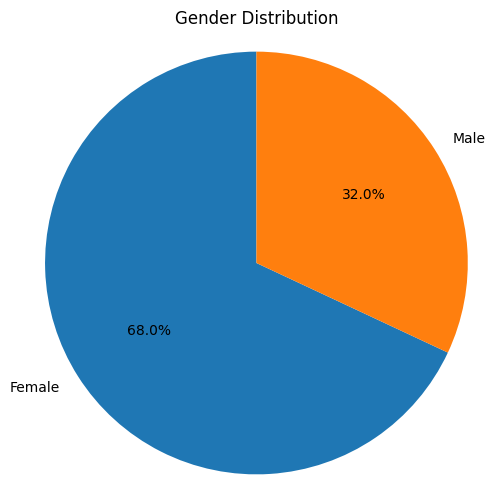

In [45]:
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()


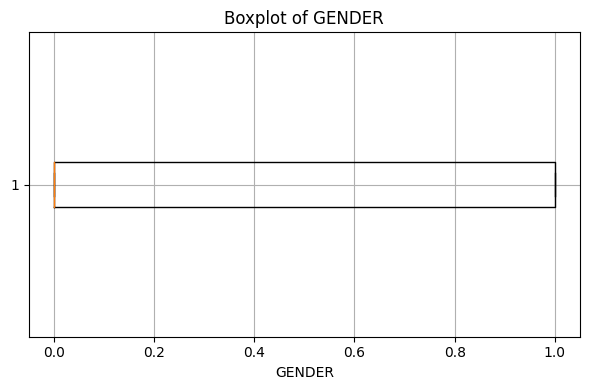

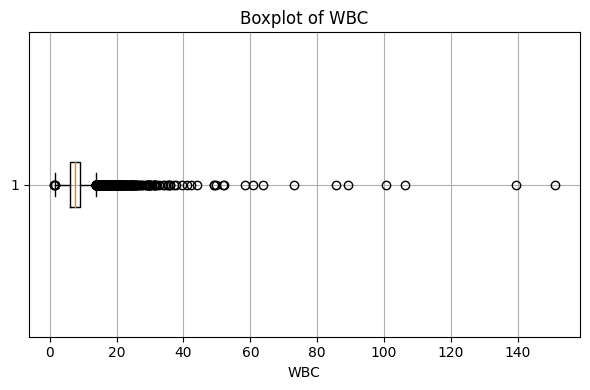

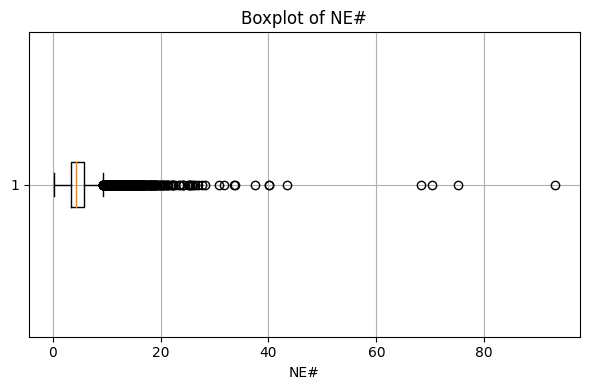

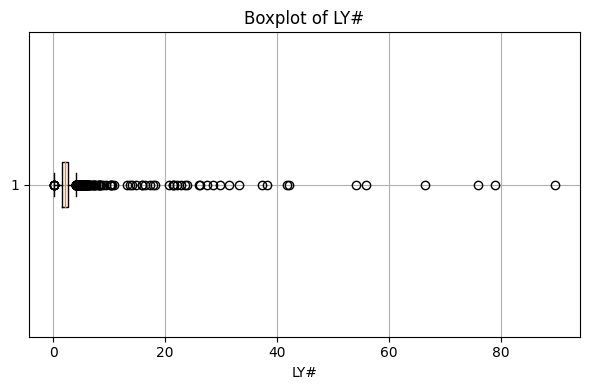

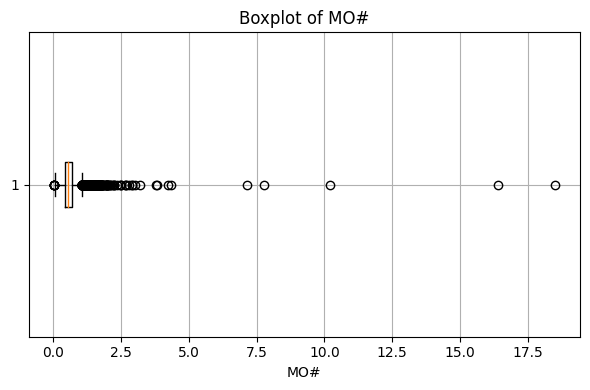

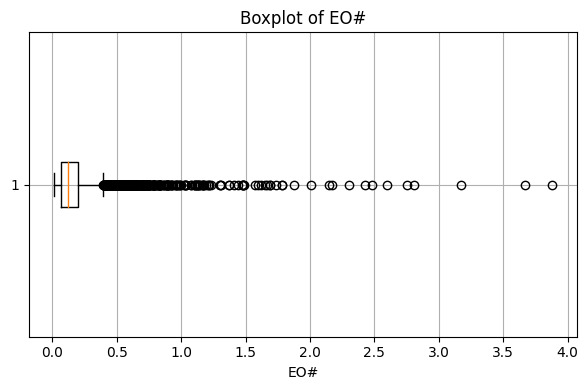

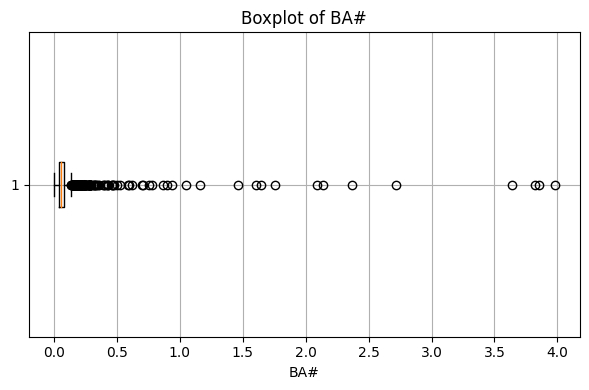

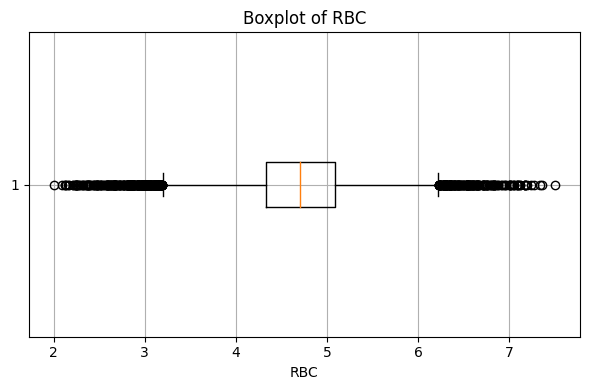

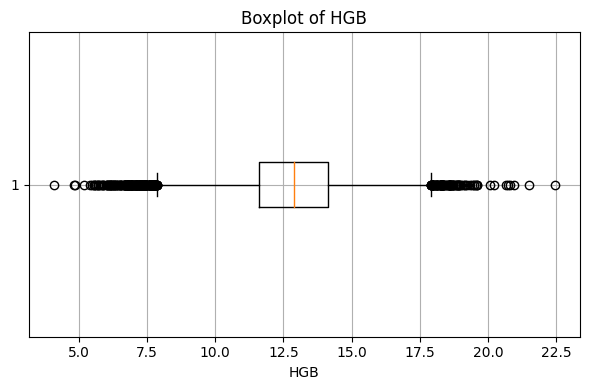

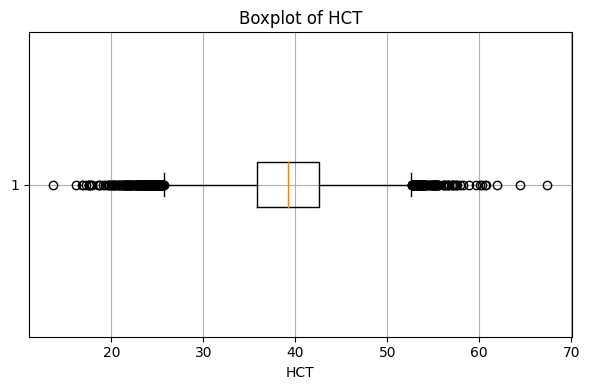

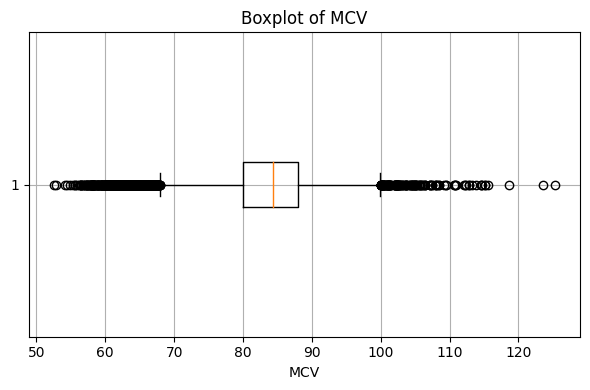

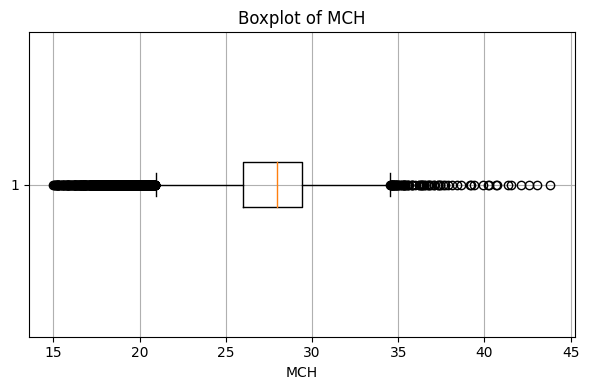

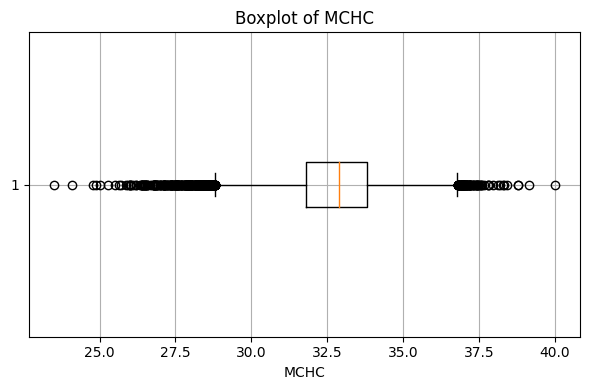

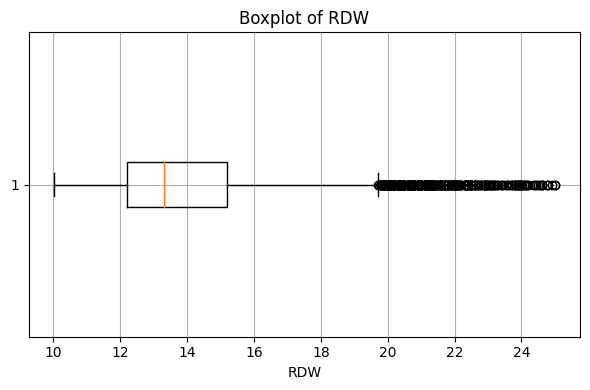

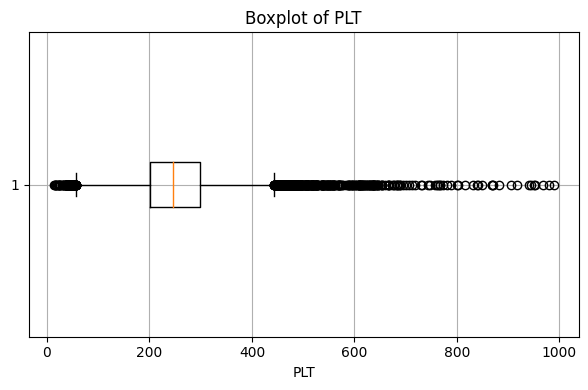

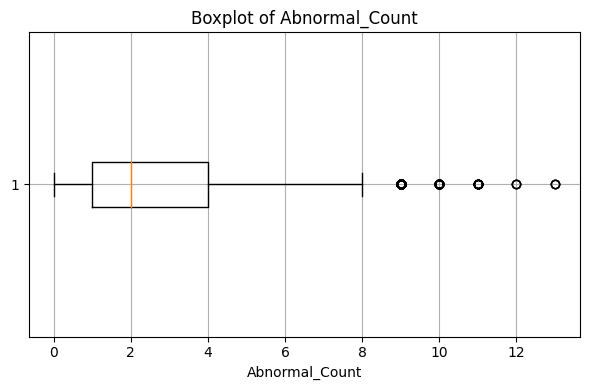

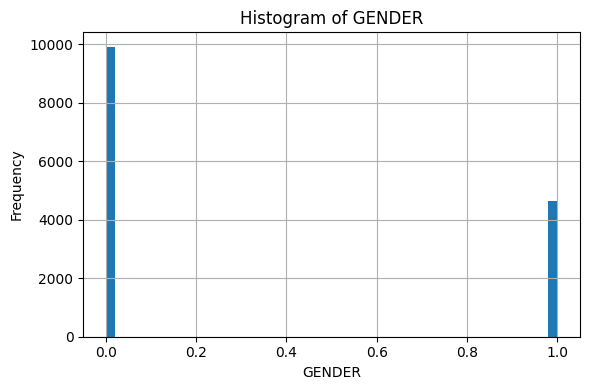

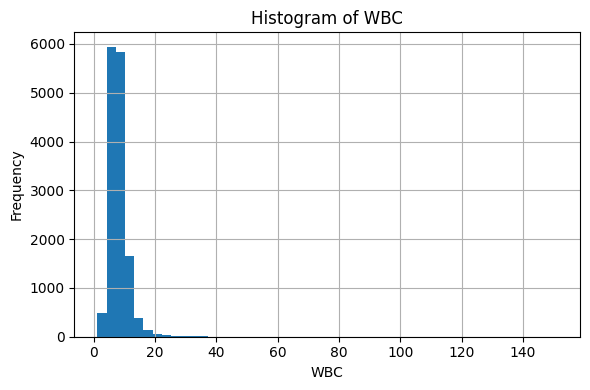

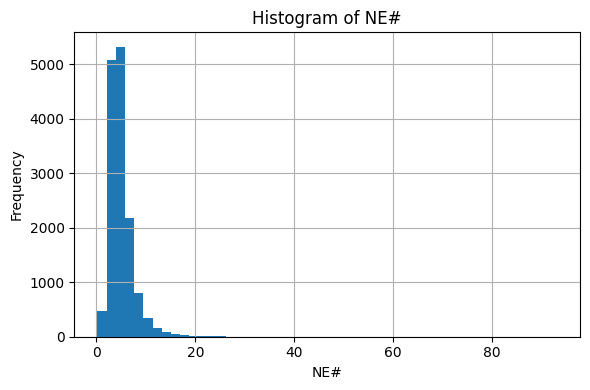

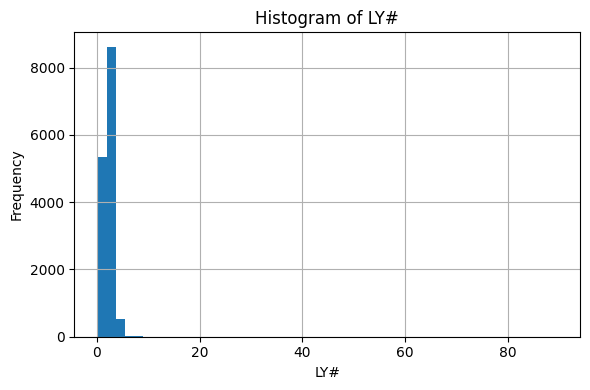

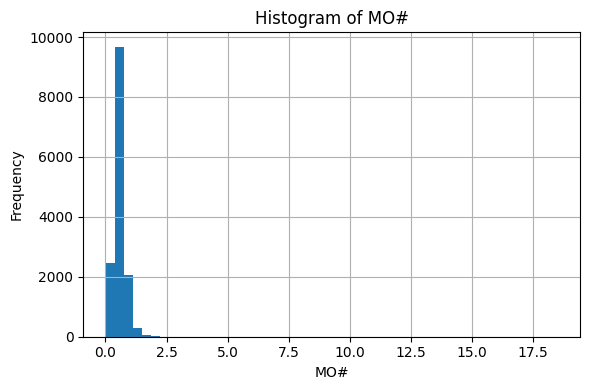

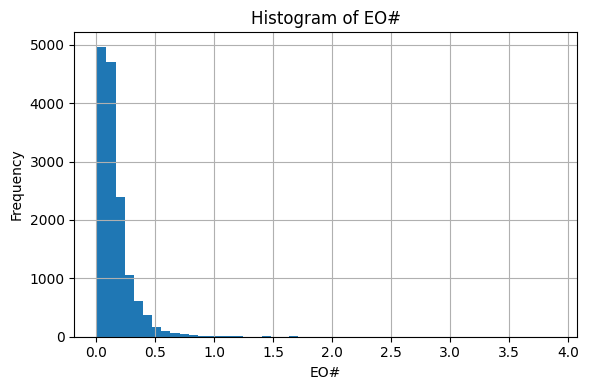

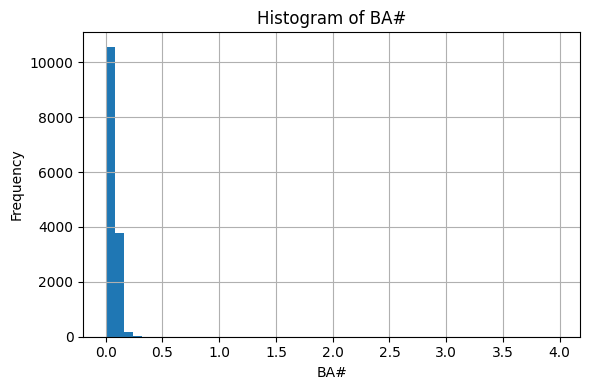

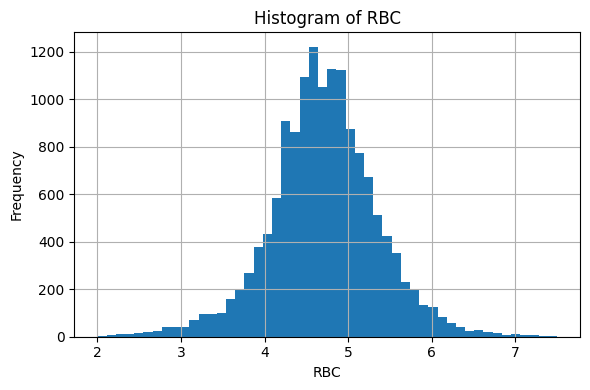

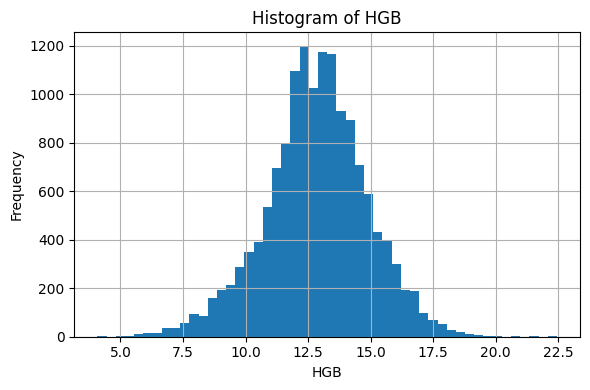

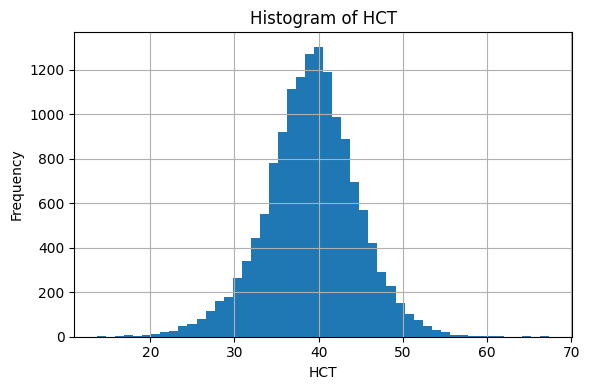

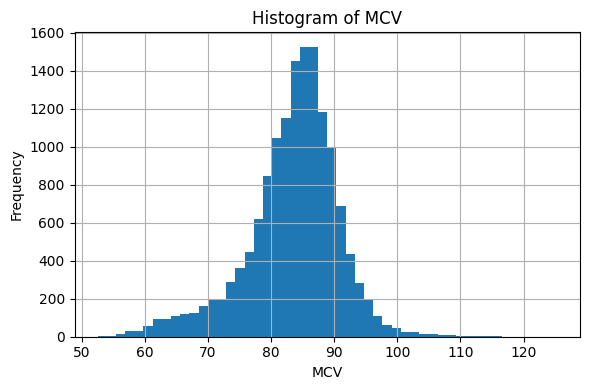

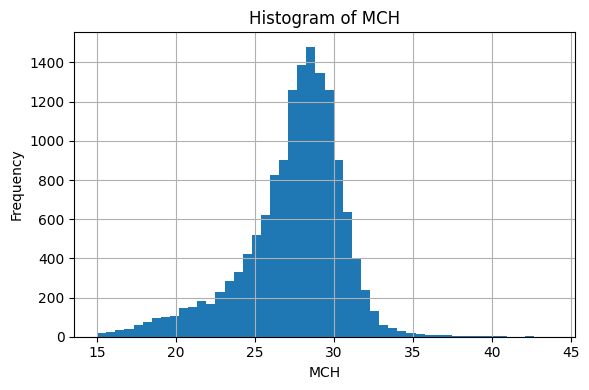

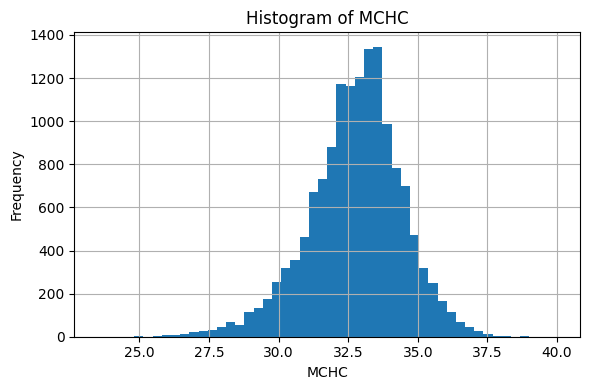

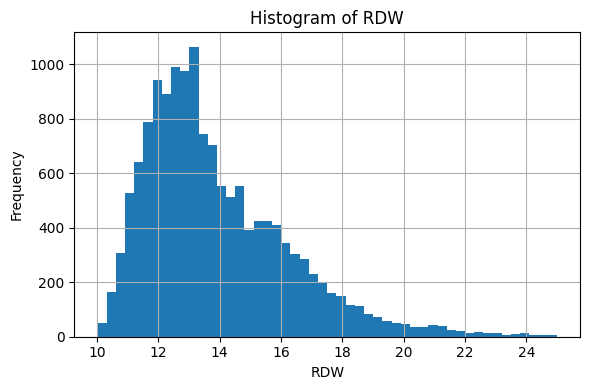

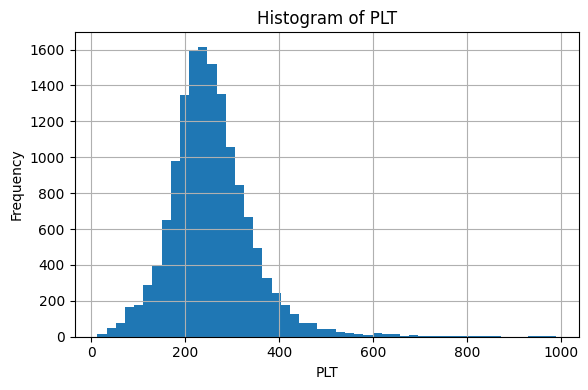

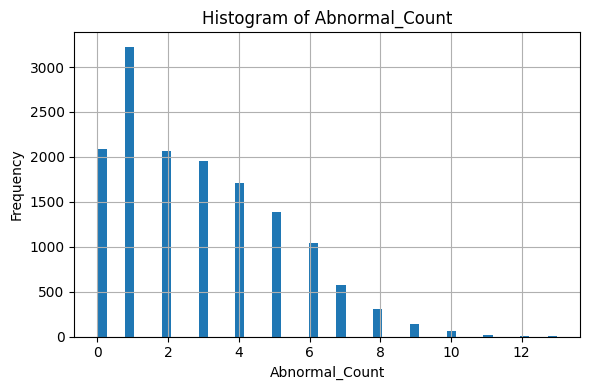

In [46]:
import matplotlib.pyplot as plt

numeric_columns = df4.select_dtypes(include='number').columns.tolist()



# رسم Boxplot لجميع الأعمدة الرقمية
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df4[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# رسم Histogram لجميع الأعمدة الرقمية
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df4[col].dropna(), bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



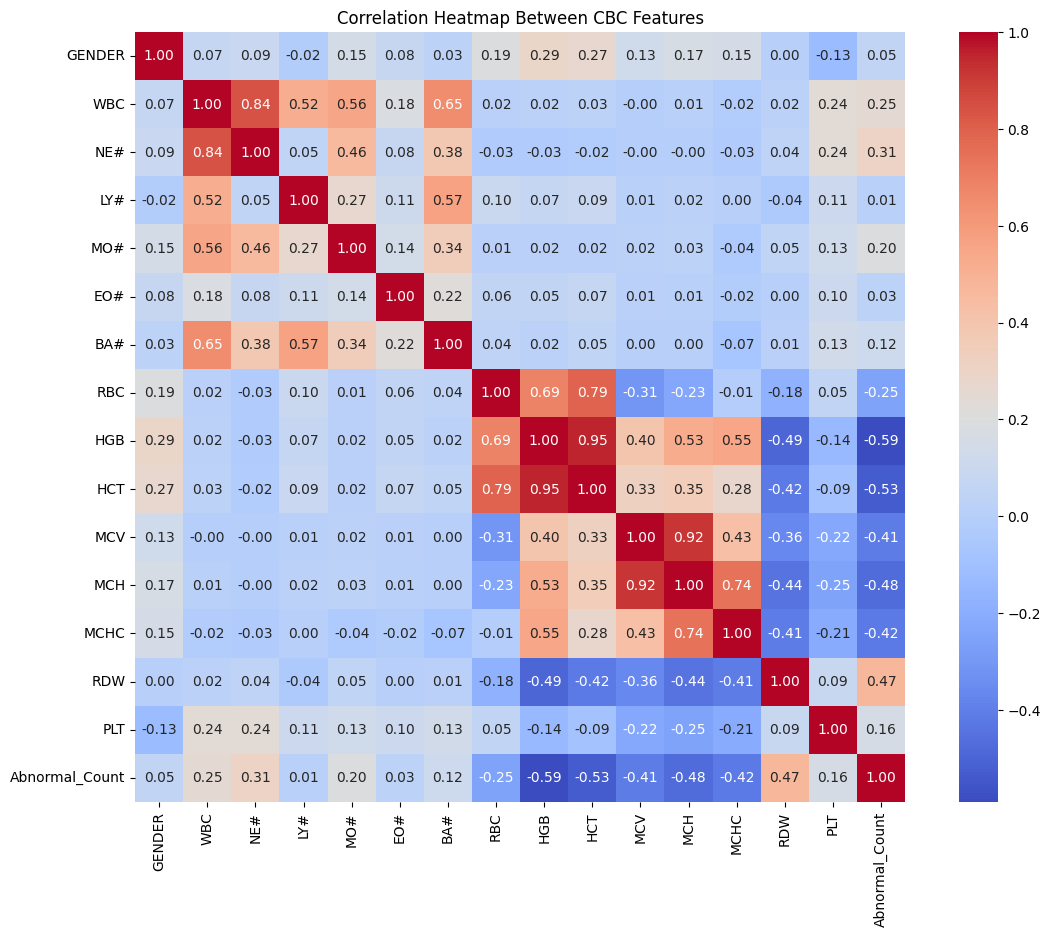

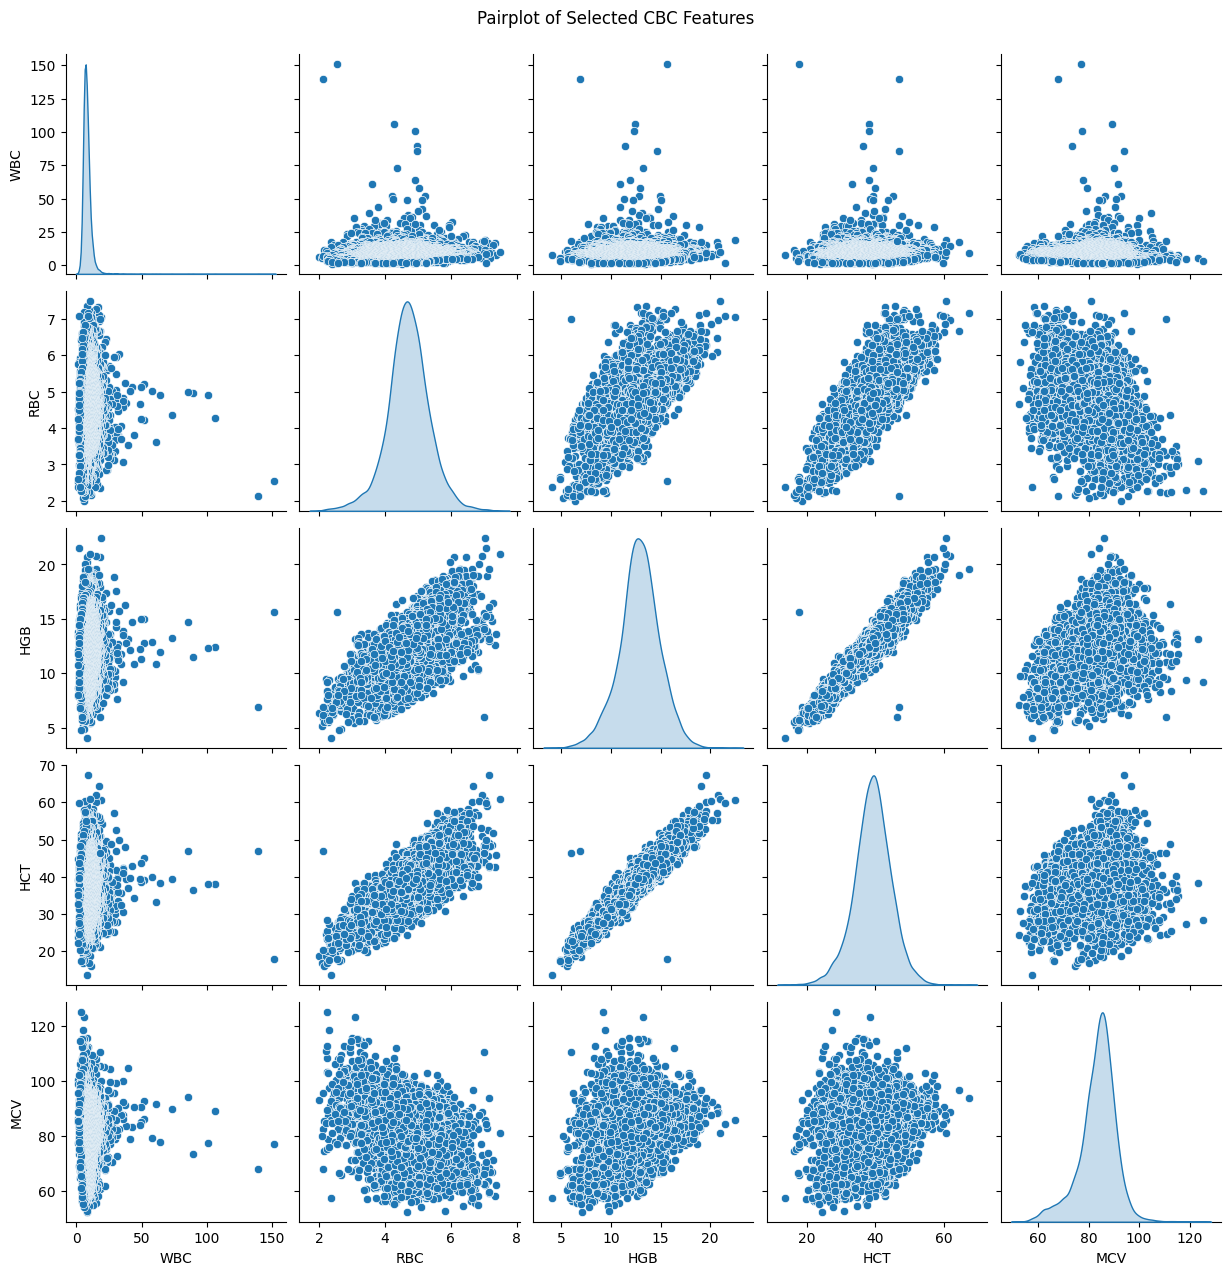

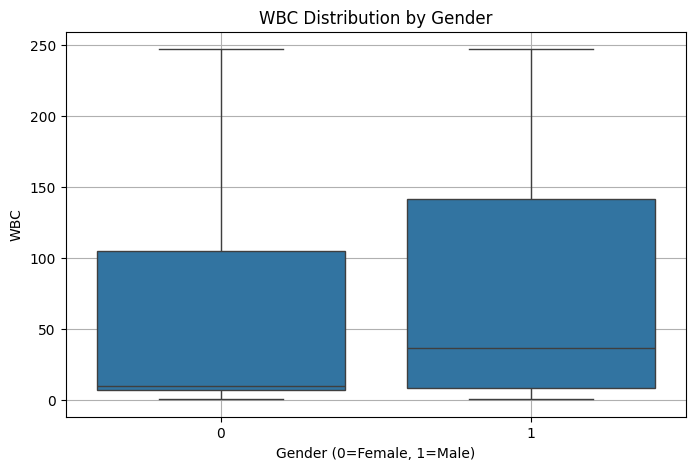

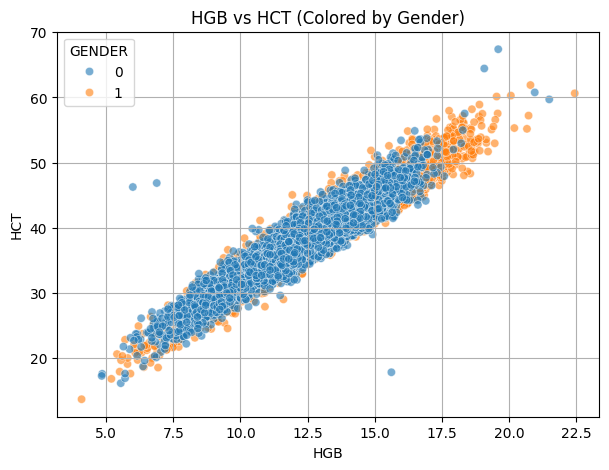

In [47]:
import seaborn as sns

plt.style.use('default')

plt.figure(figsize=(14, 10))
corr_matrix = df4[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap Between CBC Features")
plt.show()

sns.pairplot(df4[["WBC", "RBC", "HGB", "HCT", "MCV"]], diag_kind="kde")
plt.suptitle("Pairplot of Selected CBC Features", y=1.02)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="GENDER", y="WBC", data=df2)
plt.title("WBC Distribution by Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("WBC")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df4, x="HGB", y="HCT", hue="GENDER", alpha=0.6)
plt.title("HGB vs HCT (Colored by Gender)")
plt.grid(True)
plt.show()


In [48]:
df4.head(20)

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Abnormal_Count
0,1,106.32,93.10,6.01,1.72,1.67,3.82,4.27,12.40,38.10,89.20,29.00,32.50,16.60,240.00,9
1,1,89.31,7.67,78.98,0.54,0.04,2.09,4.97,11.46,36.44,73.38,23.08,31.46,13.10,75.99,8
2,1,85.73,75.17,4.55,4.34,0.20,1.46,4.99,14.68,46.96,94.09,29.42,31.27,14.38,160.90,5
3,1,73.09,3.42,66.45,0.76,0.09,2.37,4.37,13.24,39.30,90.00,30.31,33.68,14.45,116.70,5
4,1,60.87,3.23,54.05,1.67,0.30,1.61,3.62,10.89,33.21,91.69,30.06,32.78,14.31,125.50,8
6,1,58.26,6.34,33.13,18.51,0.17,0.11,5.03,12.90,39.90,79.30,25.60,32.30,18.00,341.00,7
7,1,52.10,43.46,3.89,4.22,0.25,0.28,5.22,14.95,45.06,86.36,28.65,33.17,14.62,229.40,4
9,1,51.77,40.18,4.68,2.10,1.17,3.64,4.23,12.80,39.20,92.70,30.30,32.70,16.60,989.00,10
10,1,49.66,6.49,41.72,0.41,0.10,0.94,4.24,11.34,38.48,90.76,26.76,29.48,13.82,93.13,8
11,1,49.22,3.68,38.18,7.13,0.11,0.12,5.13,15.00,43.70,85.20,29.20,34.30,13.20,135.00,4


In [49]:
import pandas as pd
# تحميل البيانات
df0 = pd.read_csv("CBC-With-Abnormal-Count.csv")
def generate_target_priority(row):
    gender = row['GENDER']
    hgb = row['HGB']
    mcv = row['MCV']
    mch = row['MCH']
    rdw = row['RDW']
    plt = row['PLT']
    wbc = row['WBC']
    rbc = row['RBC']

    scores = {}

    # Iron Deficiency Anemia
    if ((gender == 0 and hgb < 12) or (gender == 1 and hgb < 13)) and mcv < 80 and mch < 27 and rdw > 15:
        score = 5
        if hgb < (10 if gender == 0 else 11):
            score += 2
        if rdw > 16:
            score += 1
        scores["Iron Deficiency Anemia"] = score

    # Macrocytic Anemia
    if ((gender == 0 and hgb < 12) or (gender == 1 and hgb < 13)) and mcv > 100:
        score = 4
        if mcv > 110:
            score += 2
        scores["Macrocytic Anemia"] = score

    # Microcytic Anemia
    if ((gender == 0 and hgb < 12) or (gender == 1 and hgb < 13)) and mcv < 80:
        score = 3
        if mcv < 70:
            score += 1
        scores["Microcytic Anemia"] = score

    # Thrombocytopenia
    if ((gender == 0 and plt < 157) or (gender == 1 and hgb < 135)):
        score = 2
        if plt < 100:
            score += 1
        scores["Thrombocytopenia"] = score

    # Thrombocytosis
    if plt > 400:
        score = 2
        if plt > 600:
            score += 1
        scores["Thrombocytosis"] = score

    # Leukopenia
    if ((gender == 0 and wbc < 3.5) or (gender == 1 and wbc < 4.0)):
        score = 1
        if wbc < 2.5:
            score += 1
        scores["Leukopenia"] = score

    # Leukocytosis
    if wbc > 11.0:
        score = 1
        if wbc > 20:
            score += 2
        scores["Leukocytosis"] = score

    # Erythropenia
    if ((gender == 0 and rbc < 4.0) or (gender == 1 and rbc < 4.5)):
        score = 1
        if rbc < 3.5:
            score += 1
        scores["Erythropenia"] = score

    return max(scores, key=scores.get) if scores else "Normal"

# # تطبيق الدالة
df0["disease"] = df0.apply(generate_target_priority, axis=1)

# # حفظ النتائج
df0.to_csv("CBC-With-Target.csv", index=False)


In [50]:
df0.head()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Abnormal_Count,disease
0,1,106.32,93.10,6.01,1.72,1.67,3.82,4.27,12.40,38.10,89.20,29.00,32.50,16.60,240.00,9,Leukocytosis
1,1,89.31,7.67,78.98,0.54,0.04,2.09,4.97,11.46,36.44,73.38,23.08,31.46,13.10,75.99,8,Microcytic Anemia
2,1,85.73,75.17,4.55,4.34,0.20,1.46,4.99,14.68,46.96,94.09,29.42,31.27,14.38,160.90,5,Leukocytosis
3,1,73.09,3.42,66.45,0.76,0.09,2.37,4.37,13.24,39.30,90.00,30.31,33.68,14.45,116.70,5,Leukocytosis
4,1,60.87,3.23,54.05,1.67,0.30,1.61,3.62,10.89,33.21,91.69,30.06,32.78,14.31,125.50,8,Leukocytosis


In [51]:
df0.shape

(14581, 17)

In [52]:
df0.info

<bound method DataFrame.info of        GENDER     WBC    NE#    LY#    MO#   EO#   BA#   RBC    HGB    HCT  \
0           1  106.32  93.10   6.01   1.72  1.67  3.82  4.27  12.40  38.10   
1           1   89.31   7.67  78.98   0.54  0.04  2.09  4.97  11.46  36.44   
2           1   85.73  75.17   4.55   4.34  0.20  1.46  4.99  14.68  46.96   
3           1   73.09   3.42  66.45   0.76  0.09  2.37  4.37  13.24  39.30   
4           1   60.87   3.23  54.05   1.67  0.30  1.61  3.62  10.89  33.21   
...       ...     ...    ...    ...    ...   ...   ...   ...    ...    ...   
14576       0    1.56   0.81   0.58   0.11  0.06  0.01  2.59   7.98  22.18   
14577       0    1.49   0.23   1.08   0.12  0.04  0.02  3.69  10.79  32.70   
14578       0  151.16  68.31  17.82  16.42  1.49  3.98  2.55  15.62  17.81   
14579       0   18.26  14.30  75.93  10.21  1.41  2.14  7.01   5.99  46.25   
14580       0  139.51  70.28   3.33   0.04  2.81  2.72  2.12   6.88  46.86   

          MCV    MCH   MCHC    

In [53]:
df0.describe()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Abnormal_Count
count,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000,14581.000000
mean,0.319663,8.024225,4.957052,2.271656,0.571760,0.159481,0.063544,4.702895,12.833887,39.101103,83.458287,27.396632,32.758253,13.909888,255.378394,2.871819
std,0.466362,3.888411,2.836449,1.930035,0.331315,0.163187,0.088109,0.646734,2.050181,5.463425,7.364413,3.180432,1.690344,2.366287,89.414406,2.297094
min,0.000000,1.150000,0.190000,0.110000,0.010000,0.010000,0.000000,2.000000,4.080000,13.670000,52.500000,15.000000,23.490000,10.010000,13.000000,0.000000
25%,0.000000,6.110000,3.390000,1.670000,0.420000,0.070000,0.040000,4.330000,11.620000,35.810000,79.930000,26.000000,31.800000,12.200000,202.000000,1.000000
50%,0.000000,7.470000,4.390000,2.140000,0.530000,0.120000,0.057000,4.700000,12.890000,39.220000,84.400000,27.990000,32.900000,13.300000,246.800000,2.000000
75%,1.000000,9.160000,5.790000,2.650000,0.670000,0.200000,0.080000,5.087000,14.130000,42.540000,87.930000,29.400000,33.800000,15.200000,298.300000,4.000000
max,1.000000,151.160000,93.100000,89.600000,18.510000,3.880000,3.980000,7.500000,22.450000,67.400000,125.300000,43.800000,40.000000,25.000000,989.000000,13.000000


In [54]:
df0.duplicated().sum()


0

In [55]:
df0.isnull().sum()

GENDER            0
WBC               0
NE#               0
LY#               0
MO#               0
EO#               0
BA#               0
RBC               0
HGB               0
HCT               0
MCV               0
MCH               0
MCHC              0
RDW               0
PLT               0
Abnormal_Count    0
disease           0
dtype: int64

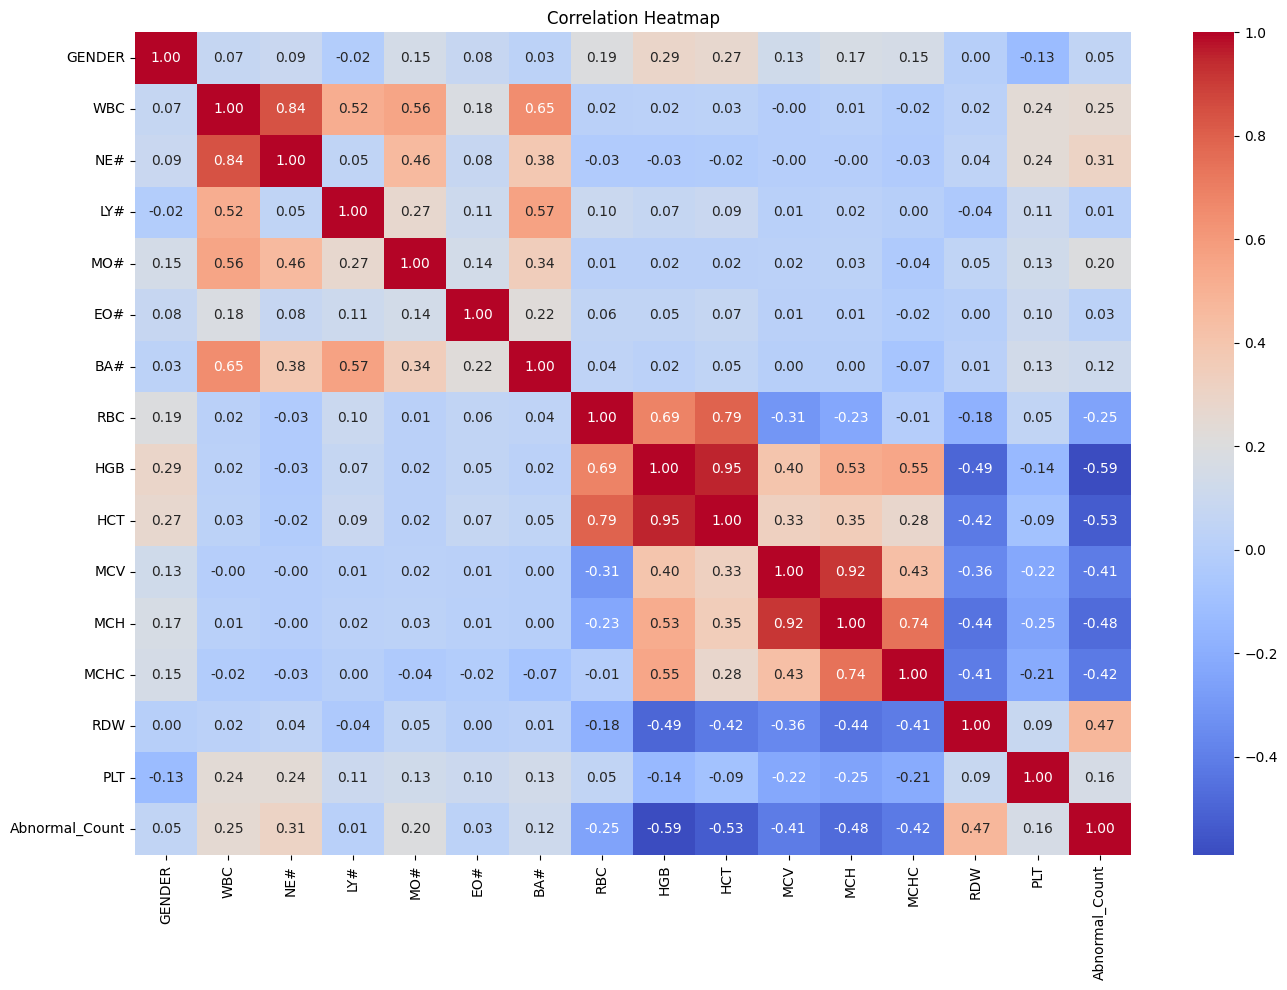

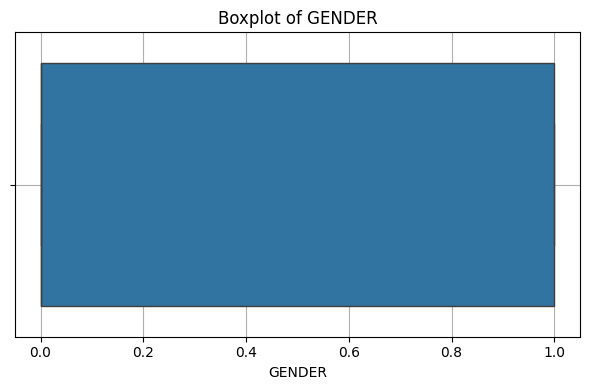

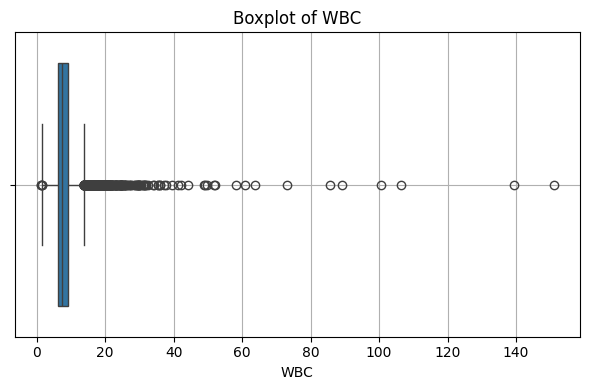

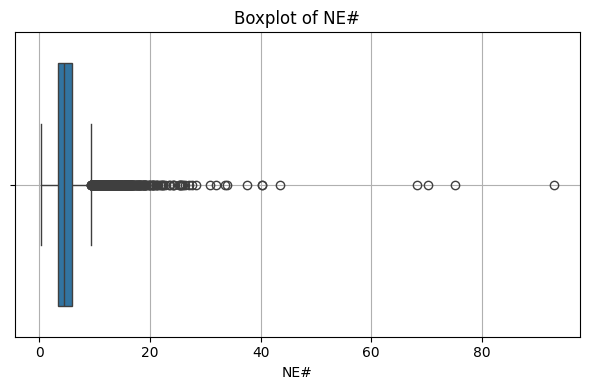

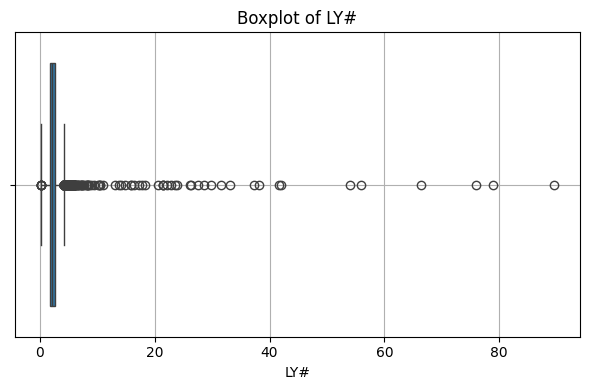

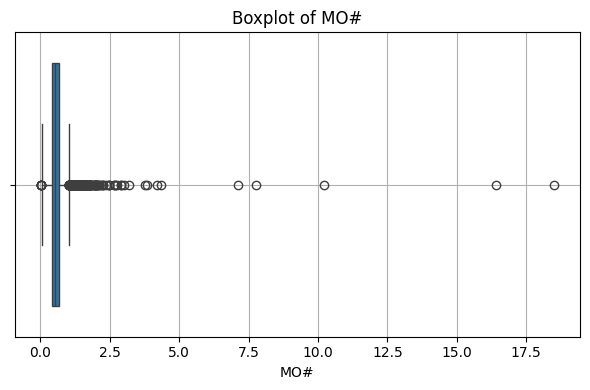

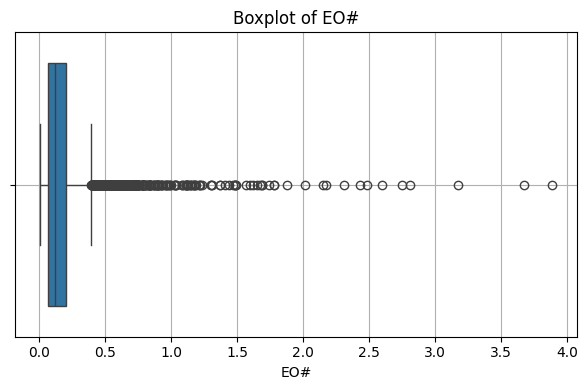

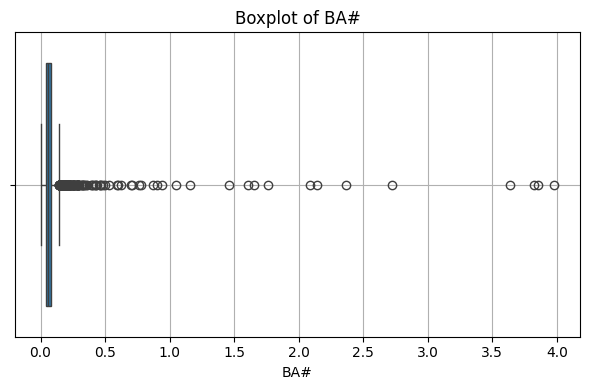

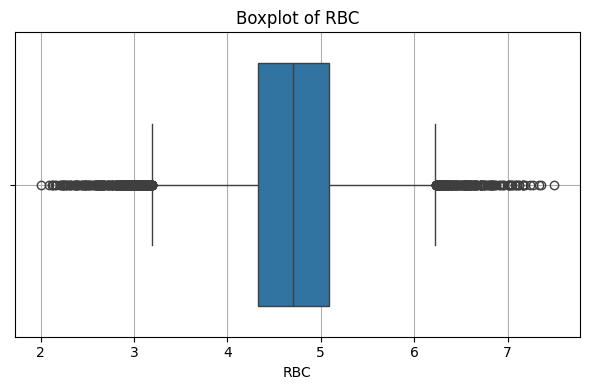

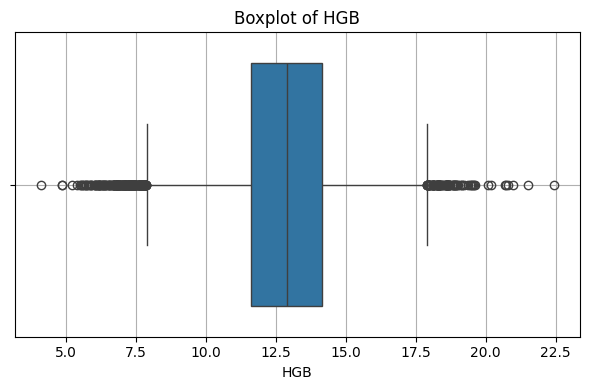

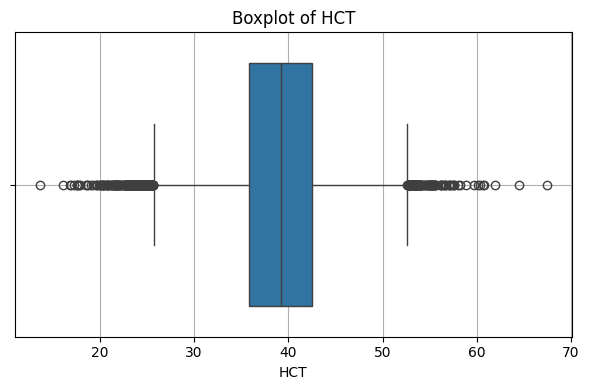

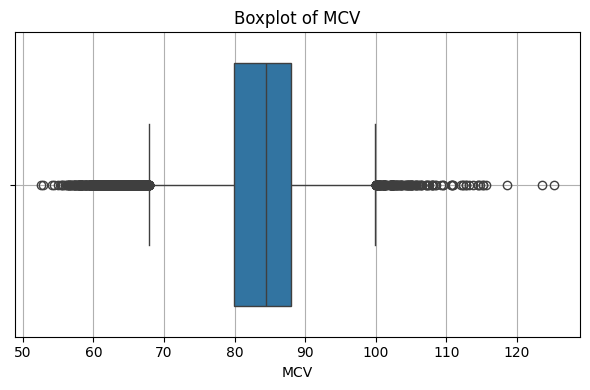

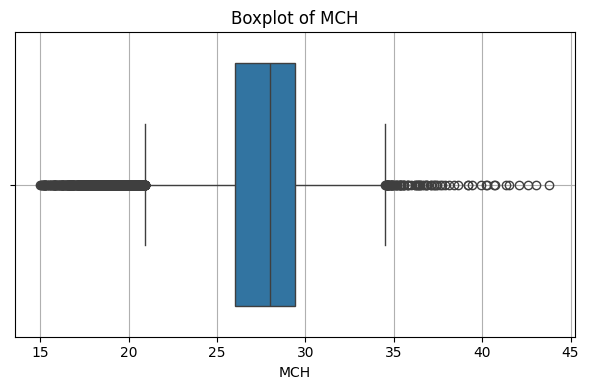

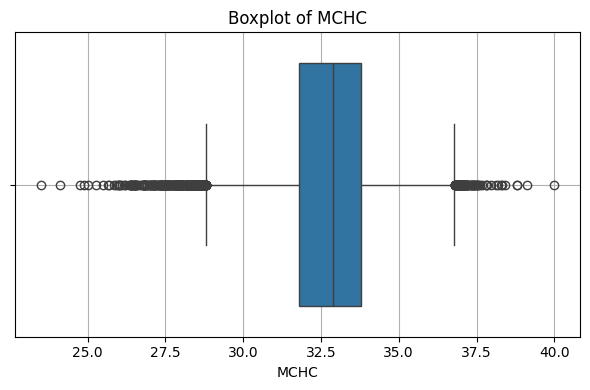

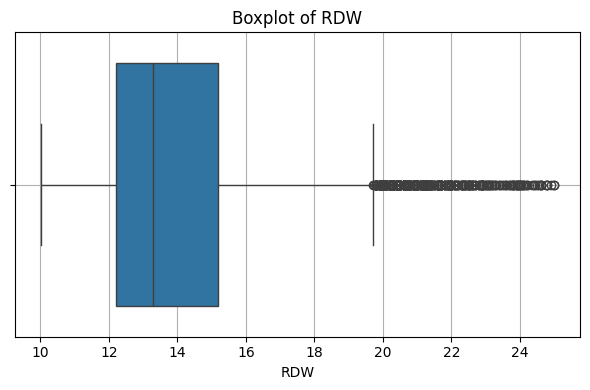

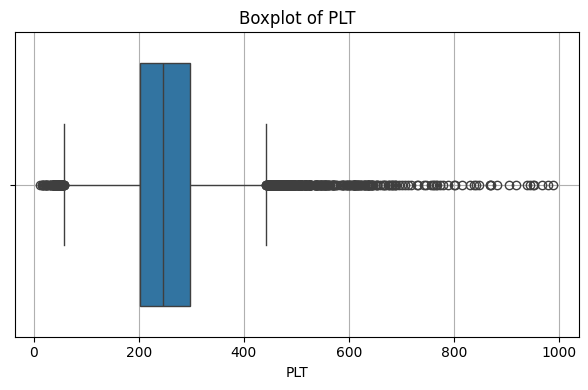

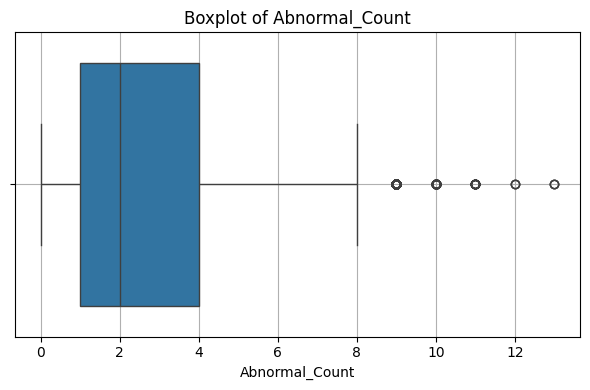

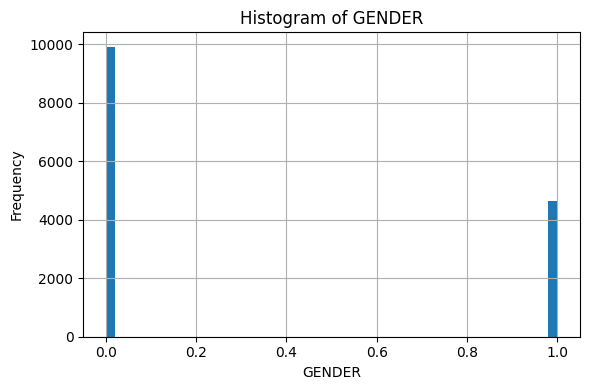

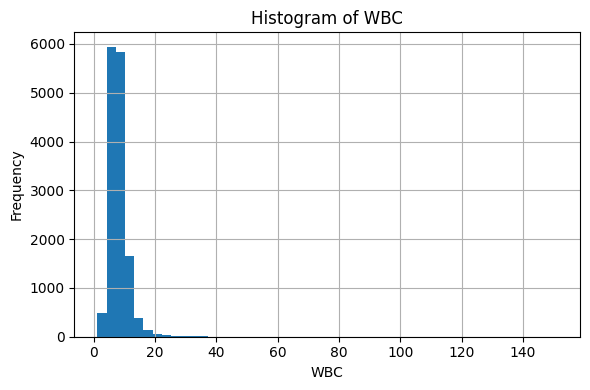

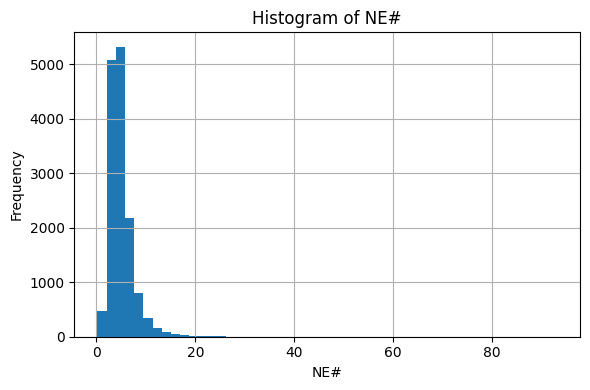

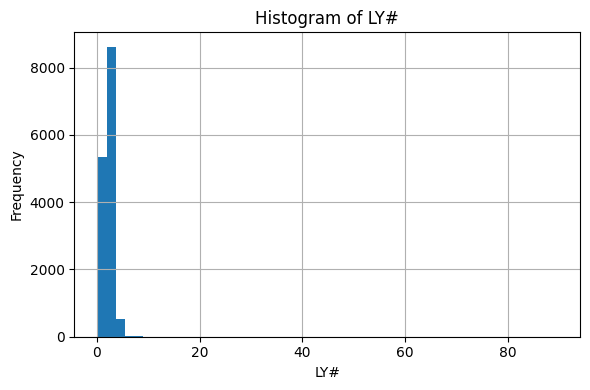

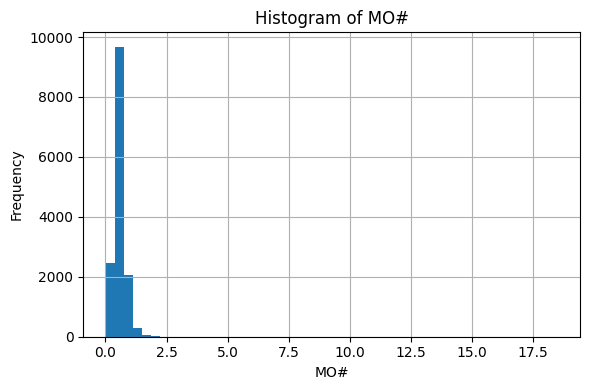

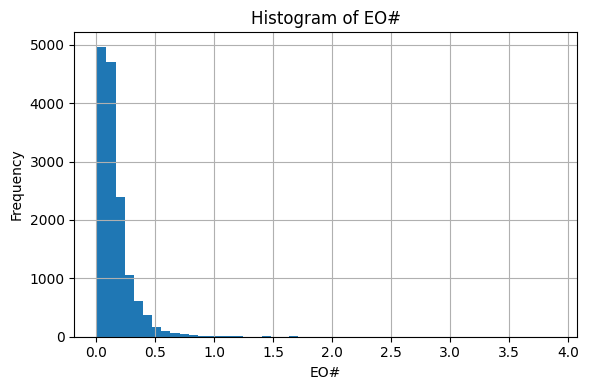

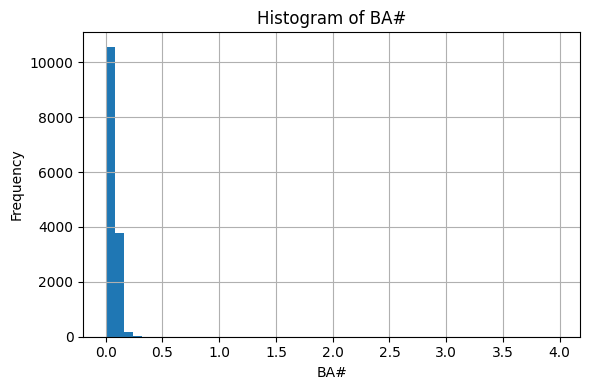

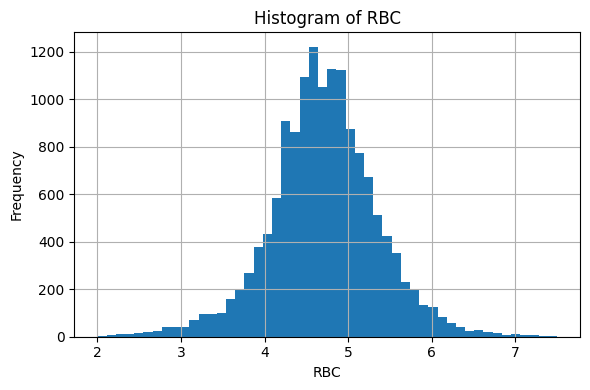

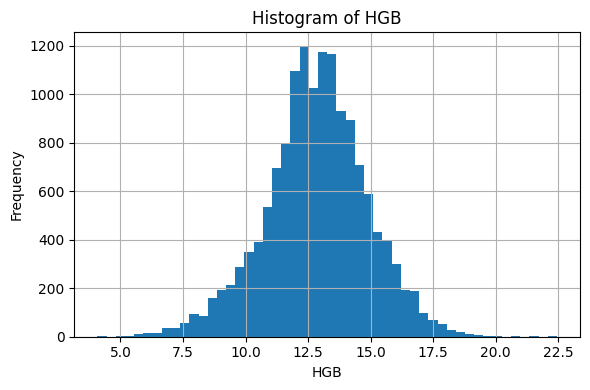

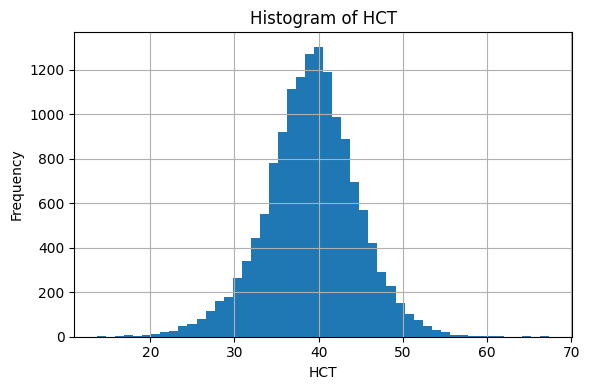

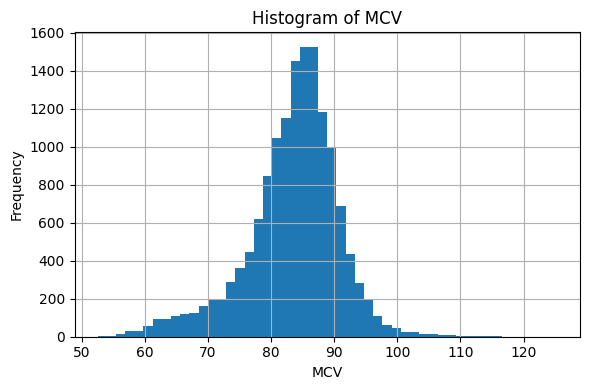

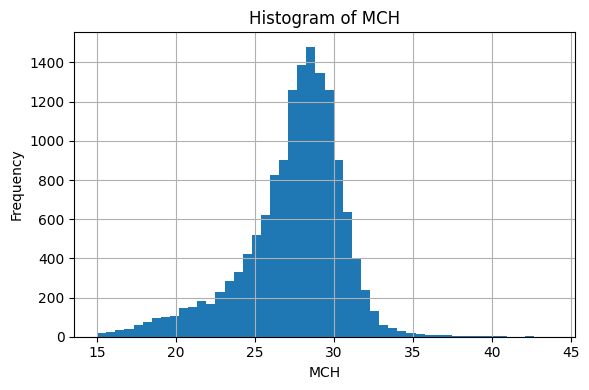

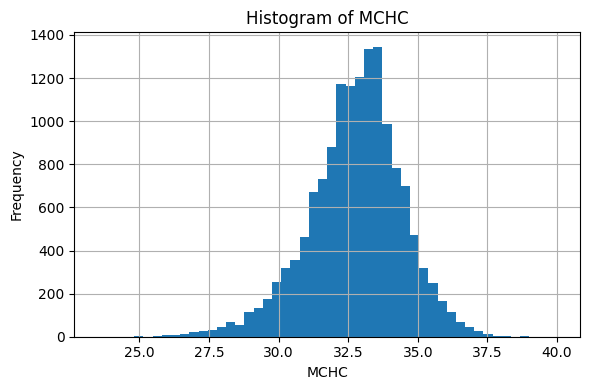

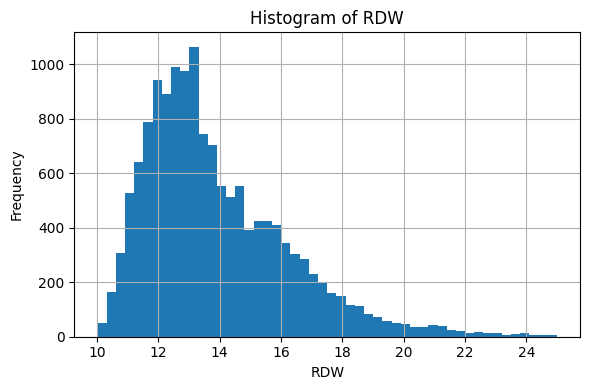

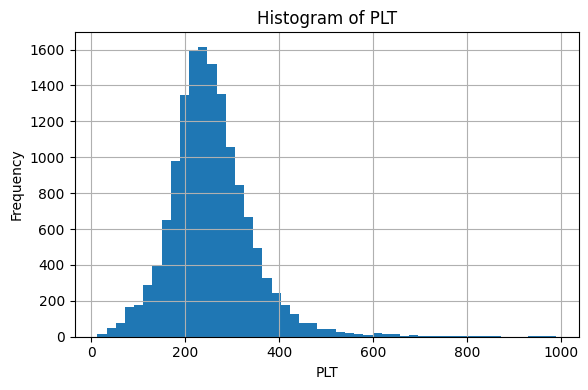

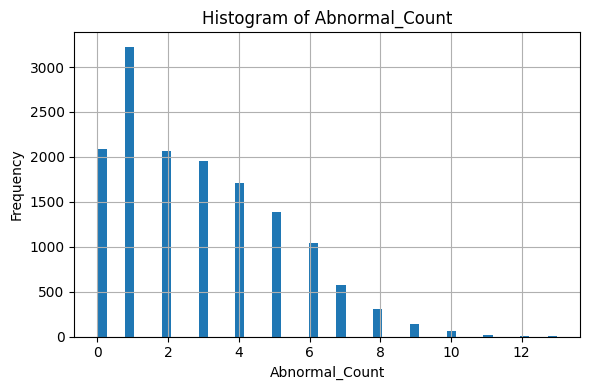

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 10))
sns.heatmap(df0.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 4. رسم Boxplot لكل الأعمدة الرقمية
numeric_columns = df0.select_dtypes(include="number").columns.tolist()
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df0[col])
    plt.title(f"Boxplot of {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. رسم Histogram لكل الأعمدة الرقمية
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df0[col], bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



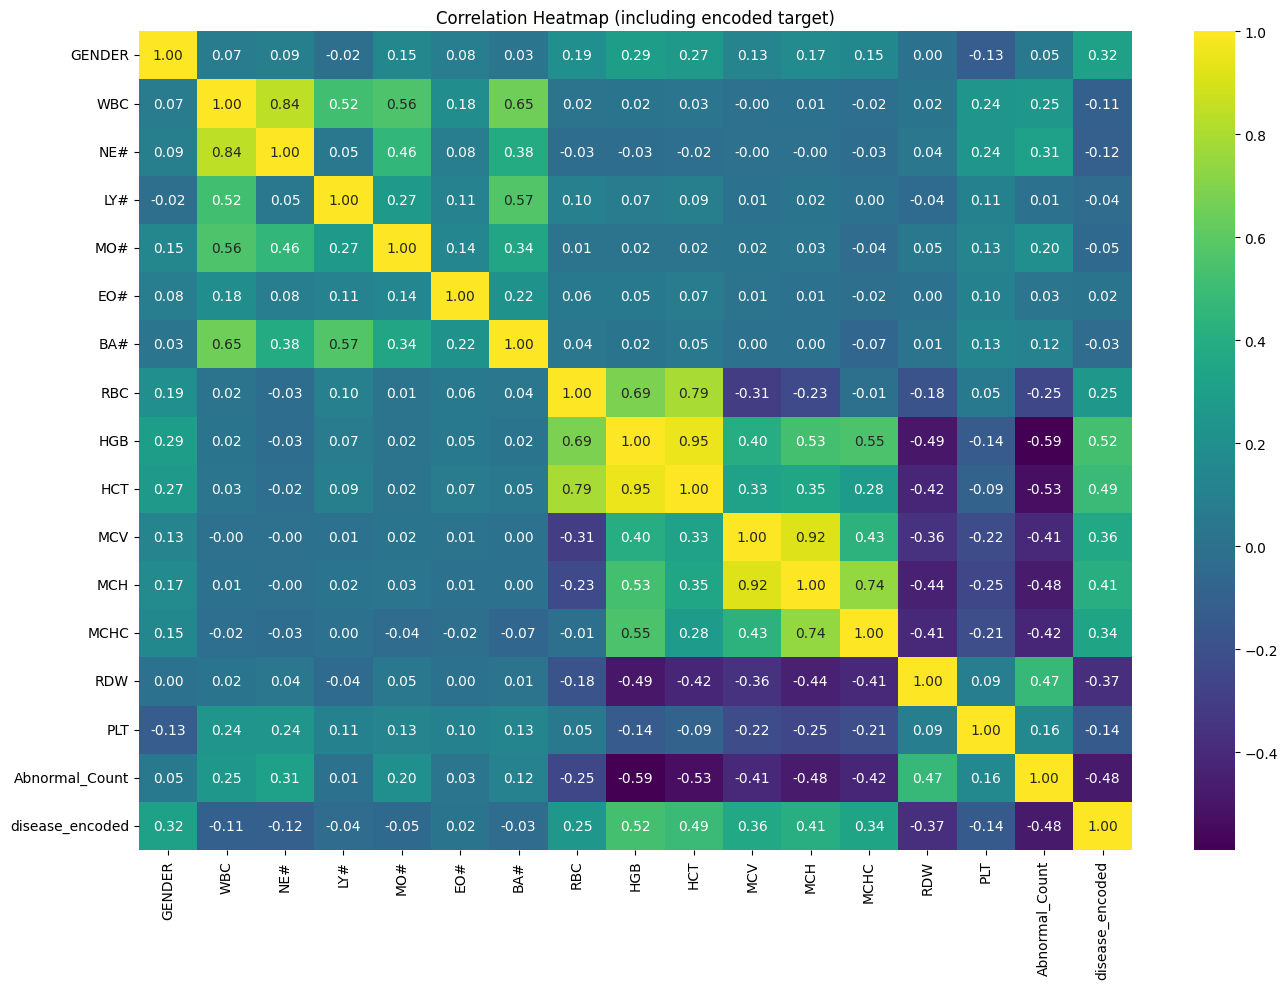

In [57]:
from sklearn.preprocessing import LabelEncoder

# نسخ البيانات وتحويل عمود target إلى ترميز رقمي
df_encoded = df0.copy()
label_encoder = LabelEncoder()
df_encoded["disease_encoded"] = label_encoder.fit_transform(df_encoded["disease"])

# تحديث قائمة الأعمدة الرقمية وإضافة العمود المشفر
numeric_with_target = df_encoded.select_dtypes(include=["number"])

# رسم Correlation Heatmap مع عمود disease_encoded
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_with_target.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Heatmap (including encoded target)")
plt.tight_layout()
plt.show()


توزيع الأمراض:
disease
Normal                    5995
Thrombocytopenia          4611
Iron Deficiency Anemia    1446
Microcytic Anemia          884
Leukocytosis               613
Erythropenia               587
Thrombocytosis             328
Macrocytic Anemia           75
Leukopenia                  42
Name: count, dtype: int64


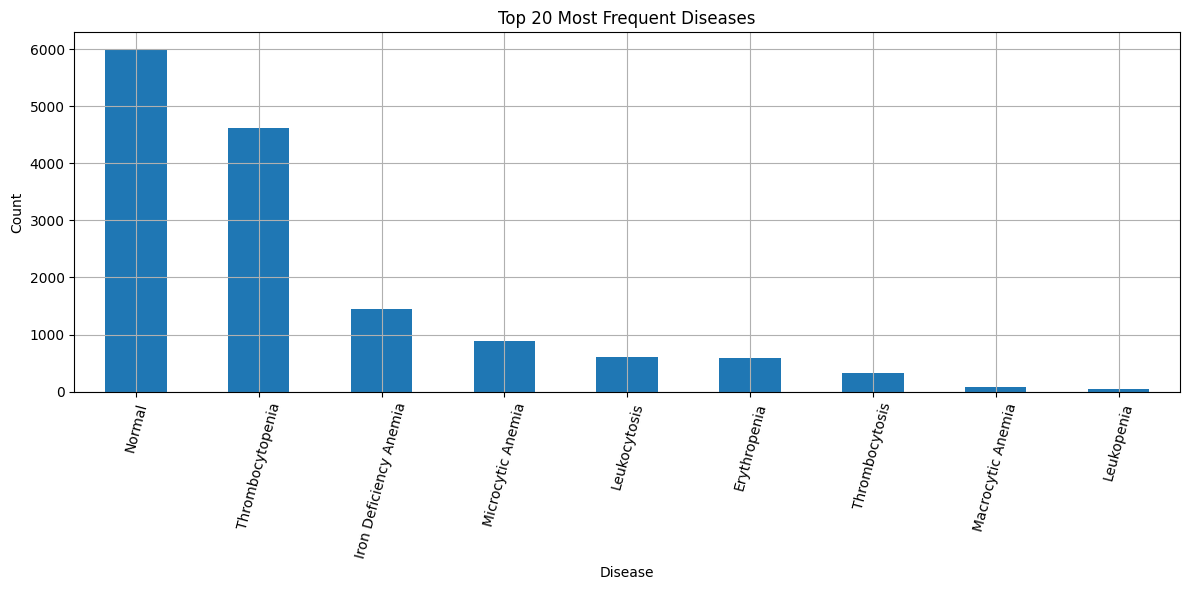

In [58]:

disease_counts = df0["disease"].value_counts()

# طباعة التوزيع في جدول
print("توزيع الأمراض:")
print(disease_counts)

# رسم مخطط شريطي لأكثر 20 مرضًا شيوعًا (اختياري)
plt.figure(figsize=(12, 6))
disease_counts.head(20).plot(kind="bar")
plt.title("Top 20 Most Frequent Diseases")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.tight_layout()
plt.grid(True)
plt.show()


## Training

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("CBC-With-Target.csv")


df=df.drop("Abnormal_Count",axis=1)


def preprocess_data(df, target_column="disease"):
    df = df.copy()
    
    df = df[df[target_column].notna()]


    X = df.drop(columns=[target_column])
    y = df[target_column]


    numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
    categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
    if "GENDER" in X.columns:
        categorical_features.append("GENDER")
        numeric_features.remove("GENDER")


    numeric_transformer = Pipeline(steps=[
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

    return X, y, preprocessor


In [60]:
df.head()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,disease
0,1,106.32,93.10,6.01,1.72,1.67,3.82,4.27,12.40,38.10,89.20,29.00,32.50,16.60,240.00,Leukocytosis
1,1,89.31,7.67,78.98,0.54,0.04,2.09,4.97,11.46,36.44,73.38,23.08,31.46,13.10,75.99,Microcytic Anemia
2,1,85.73,75.17,4.55,4.34,0.20,1.46,4.99,14.68,46.96,94.09,29.42,31.27,14.38,160.90,Leukocytosis
3,1,73.09,3.42,66.45,0.76,0.09,2.37,4.37,13.24,39.30,90.00,30.31,33.68,14.45,116.70,Leukocytosis
4,1,60.87,3.23,54.05,1.67,0.30,1.61,3.62,10.89,33.21,91.69,30.06,32.78,14.31,125.50,Leukocytosis


In [61]:


X, y, preprocessor = preprocess_data(df)

In [62]:


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [63]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [64]:

# لماذا اخترنا RandomForest كبيزلاين؟
#  يعمل جيدًا مع البيانات المختلطة (رقمية + تصنيفية)
#  لا يتأثر كثيرًا بالتحجيم
#  قوي مع عدم التوازن عند تفعيل class_weight
#  يعطي نتائج مقبولة بدون ضبط معلمات

baseline_model = RandomForestClassifier(
    class_weight="balanced",  # مهم للتعامل مع عدم التوازن
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42
)


In [65]:


pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", baseline_model)
])
print(" Pipeline Steps:")
for name, step in pipeline.steps:
    print(f"{name}: {step}")


 Pipeline Steps:
preprocessor: ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['WBC', 'NE#', 'LY#', 'MO#', 'EO#', 'BA#',
                                  'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC',
                                  'RDW', 'PLT']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['GENDER'])])
classifier: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, n_estimators=200, random_state=42)


In [66]:
print(" Baseline Model (Classifier):")
print(pipeline.named_steps["classifier"])


 Baseline Model (Classifier):
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, n_estimators=200, random_state=42)


In [67]:


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)


print(" Baseline RandomForest Model Classification Report:\n")
print(report)


 Baseline RandomForest Model Classification Report:

                        precision    recall  f1-score   support

          Erythropenia       0.84      0.99      0.91       117
Iron Deficiency Anemia       1.00      0.99      0.99       289
          Leukocytosis       0.92      0.98      0.94       123
            Leukopenia       0.78      0.88      0.82         8
     Macrocytic Anemia       0.71      1.00      0.83        15
     Microcytic Anemia       0.98      0.98      0.98       177
                Normal       0.99      1.00      0.99      1199
      Thrombocytopenia       1.00      0.94      0.97       923
        Thrombocytosis       0.93      0.97      0.95        66

              accuracy                           0.98      2917
             macro avg       0.90      0.97      0.93      2917
          weighted avg       0.98      0.98      0.98      2917



## Feature Importance (Random Forest)

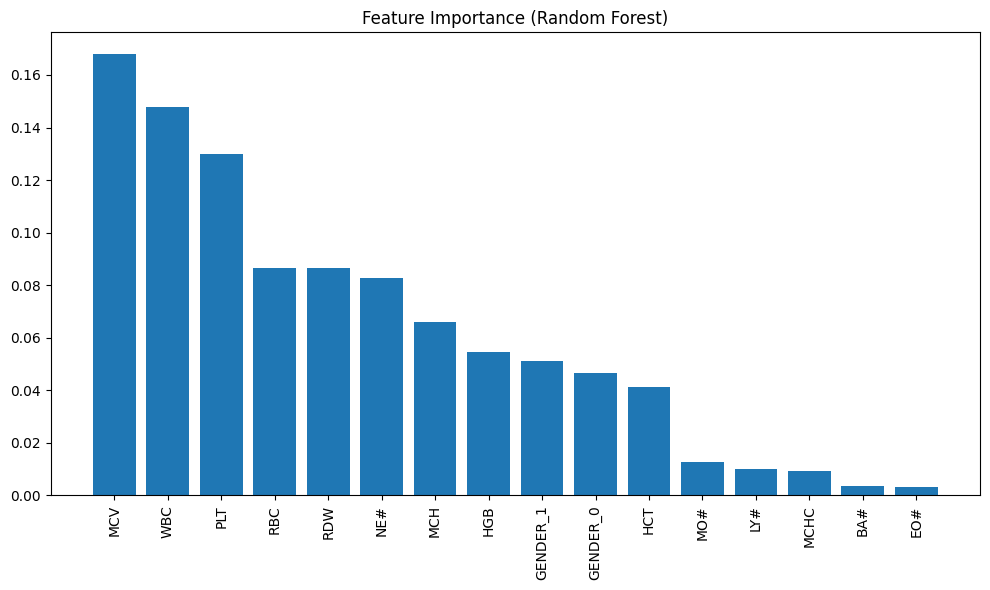

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer




numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()


if "GENDER" in X.columns:
    categorical_features.append("GENDER")
    if "GENDER" in numeric_features:
        numeric_features.remove("GENDER")


rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", baseline_model)
])


rf_pipeline.fit(X_train, y_train)




def get_feature_names(preprocessor, numeric_features, categorical_features):
    output_features = []

    for name, trans, cols in preprocessor.transformers_:
        if name == "num":
            output_features.extend(cols)
        elif name == "cat":
            ohe = trans.named_steps["encoder"]
            encoded_cols = ohe.get_feature_names_out(cols)
            output_features.extend(encoded_cols)

    return output_features


feature_names = get_feature_names(preprocessor, numeric_features, categorical_features)


importances = rf_pipeline.named_steps['classifier'].feature_importances_


if len(feature_names) != len(importances):
    feature_names = feature_names[:len(importances)]


indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


## Confusion Matrix

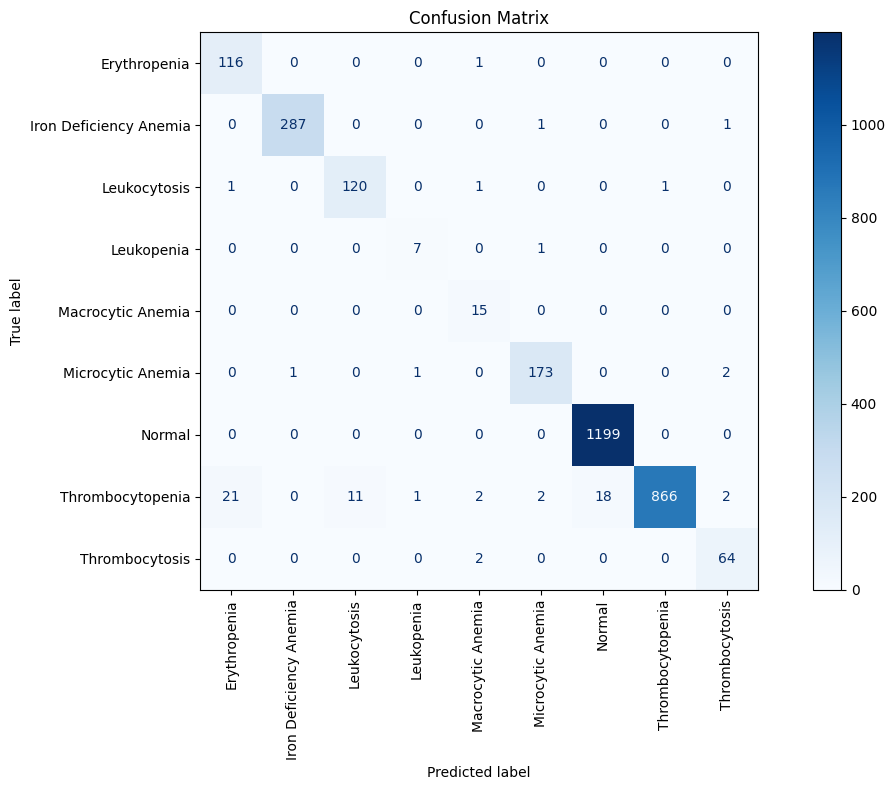

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# حساب المصفوفة
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# حجم أوضح (عرض أكبر)
fig, ax = plt.subplots(figsize=(12, 8))  # عرض أفقي
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues', colorbar=True)

# تحسينات شكلية
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()


## Learning Curve (Random Forest)

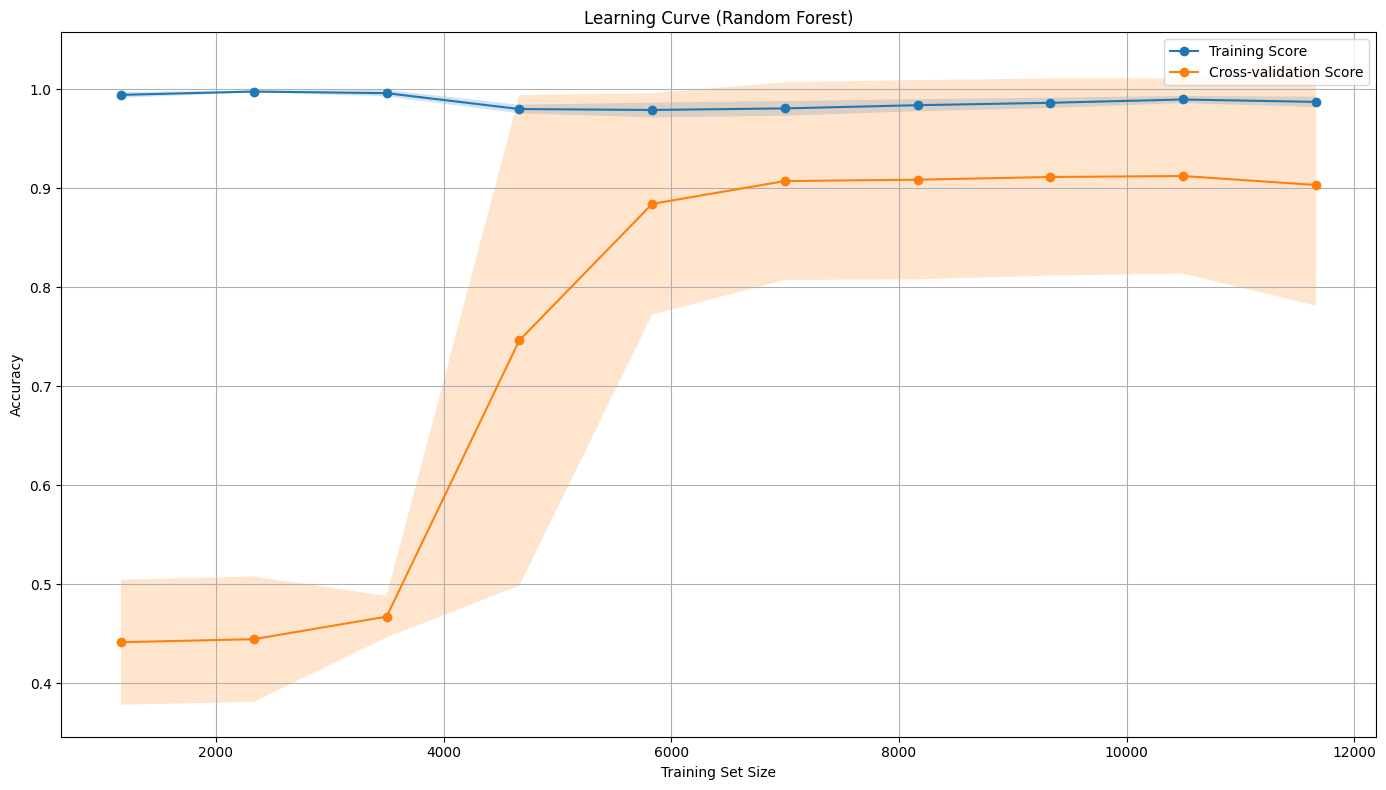

In [70]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y_encoded, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

#  2. رسم Learning Curve

# حساب المتوسط والانحراف المعياري
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# الرسم
plt.figure(figsize=(14, 8))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

plt.plot(train_sizes, test_mean, label="Cross-validation Score", marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


## Save Model + Lable Encoder

In [71]:
import joblib

# حفظ الـ pipeline المدرب
joblib.dump(pipeline, "random_forest_cbc_model.pkl")

# حفظ الـ label encoder
joblib.dump(label_encoder, "label_encoder.pkl")


['label_encoder.pkl']

In [72]:
# استدعاء النموذج والإنكودر في المشروع
model = joblib.load("random_forest_cbc_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")


# new_sample = pd.DataFrame([{"MCV": 90, "WBC": 6.5, ...}])
# prediction = model.predict(new_sample)
# decoded = label_encoder.inverse_transform(prediction)


##  test Grid Search

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# تحديد معلمات البحث الشبكي (Grid Search)
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": ["balanced"]
}

# استخدام Random Forest الأساسي
rf = RandomForestClassifier(random_state=42)

# إعداد GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)

# تدريب GridSearchCV على البيانات الأصلية (كاملة الميزات)
pipeline_full = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", grid_search)
])

pipeline_full.fit(X_train, y_train)

# أفضل نموذج
best_model = pipeline_full.named_steps["classifier"].best_estimator_

# التنبؤ
y_pred_best = best_model.predict(preprocessor.transform(X_test))

# تقرير الأداء
from sklearn.metrics import classification_report
report_best = classification_report(y_test, y_pred_best, target_names=label_encoder.classes_)
print(report_best)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
                        precision    recall  f1-score   support

          Erythropenia       1.00      0.99      1.00       117
Iron Deficiency Anemia       0.99      1.00      0.99       289
          Leukocytosis       0.99      0.98      0.98       123
            Leukopenia       0.88      0.88      0.88         8
     Macrocytic Anemia       0.88      1.00      0.94        15
     Microcytic Anemia       0.99      0.98      0.99       177
                Normal       1.00      1.00      1.00      1199
      Thrombocytopenia       0.99      1.00      1.00       923
        Thrombocytosis       1.00      0.95      0.98        66

              accuracy                           0.99      2917
             macro avg       0.97      0.97      0.97      2917
          weighted avg       0.99      0.99      0.99      2917



[learning_curve] Training set sizes: [ 972 3159 5346 7533 9720]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.3s finished


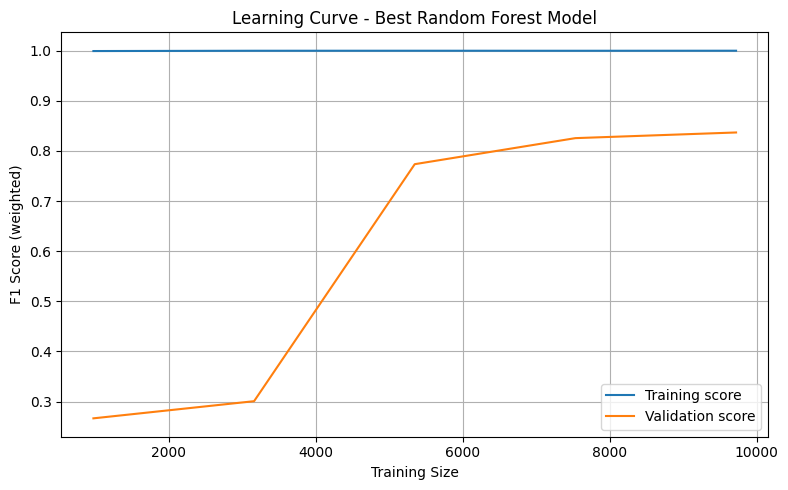

In [74]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

# 1. إنشاء pipeline جديد يحتوي على أفضل موديل + preprocessor
best_pipeline = make_pipeline(preprocessor, best_model)

# 2. حساب منحنيات التعلم
train_sizes, train_scores, test_scores = learning_curve(
    best_pipeline,
    X,
    y,
    cv=3,
    scoring="f1_weighted",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    verbose=1
)

# 3. حساب المتوسط والانحراف
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# 4. رسم المنحنى
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Validation score")
plt.xlabel("Training Size")
plt.ylabel("F1 Score (weighted)")
plt.title("Learning Curve - Best Random Forest Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## test xgboost

In [75]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# تقسيم البيانات من جديد
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)



numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
if "GENDER" in X.columns:
        categorical_features.append("GENDER")
        numeric_features.remove("GENDER")

# إعداد Preprocessor للأعمدة الرقمية فقط
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
])

# نموذج XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# بناء البايبلاين
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# التدريب
xgb_pipeline.fit(X_train, y_train)

# التنبؤ
y_pred_xgb = xgb_pipeline.predict(X_test)

# التقرير
used_class_indices_xgb = sorted(set(y_test))
used_class_names_xgb = label_encoder.inverse_transform(used_class_indices_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, labels=used_class_indices_xgb, target_names=used_class_names_xgb)

print("Classification Report (XGBoost):\n")
print(report_xgb)


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:18:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost):

                        precision    recall  f1-score   support

          Erythropenia       0.78      0.83      0.80       117
Iron Deficiency Anemia       0.97      0.97      0.97       289
          Leukocytosis       0.80      0.80      0.80       123
            Leukopenia       1.00      0.50      0.67         8
     Macrocytic Anemia       0.87      0.87      0.87        15
     Microcytic Anemia       0.94      0.91      0.93       177
                Normal       0.82      0.91      0.86      1199
      Thrombocytopenia       0.80      0.68      0.74       923
        Thrombocytosis       0.71      0.80      0.75        66

              accuracy                           0.83      2917
             macro avg       0.85      0.81      0.82      2917
          weighted avg       0.83      0.83      0.83      2917



##  test Feature Selection

In [76]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# إنشاء نسخة جديدة من الـ pipeline مع خطوة Feature Selection تلقائية
fs_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", SelectFromModel(
        estimator=RandomForestClassifier(n_estimators=100, random_state=42),
        threshold=0.01  # حذف الميزات ذات الأهمية أقل من المتوسط
    )),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"))
])

# تدريب البايبلاين الجديد
fs_pipeline.fit(X_train, y_train)

# التنبؤ
y_pred_fs = fs_pipeline.predict(X_test)

# تقرير التقييم
from sklearn.metrics import classification_report
report_fs = classification_report(y_test, y_pred_fs, target_names=label_encoder.classes_)
print(report_fs)


                        precision    recall  f1-score   support

          Erythropenia       0.74      0.77      0.75       117
Iron Deficiency Anemia       0.99      0.96      0.97       289
          Leukocytosis       0.76      0.72      0.74       123
            Leukopenia       0.75      0.38      0.50         8
     Macrocytic Anemia       0.93      0.93      0.93        15
     Microcytic Anemia       0.96      0.90      0.93       177
                Normal       0.80      0.91      0.85      1199
      Thrombocytopenia       0.78      0.64      0.70       923
        Thrombocytosis       0.73      0.86      0.79        66

              accuracy                           0.81      2917
             macro avg       0.83      0.79      0.80      2917
          weighted avg       0.82      0.81      0.81      2917

